In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
df =pd.read_csv("data\HRDataset_v14.csv")

In [4]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [5]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [6]:
pd.set_option('display.max_info_columns', 1000)  # or any large number as needed

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

## Data Cleaning and Preprocessing


In [8]:
# Duplicate Handling

df.duplicated().sum() 

0

In [9]:
# we are going to use apporach- going column by column ensuring no details is missed
#We start with "Employee_Name" 

df["Employee_Name"]

0           Adinolfi, Wilson  K
1      Ait Sidi, Karthikeyan   
2             Akinkuolie, Sarah
3                  Alagbe,Trina
4              Anderson, Carol 
                 ...           
306              Woodson, Jason
307          Ybarra, Catherine 
308            Zamora, Jennifer
309                 Zhou, Julia
310               Zima, Colleen
Name: Employee_Name, Length: 311, dtype: object

In [10]:
# Check for leading/trailing spaces and title case issues
df['Employee_Name'].apply(lambda x: x != x.strip() or x != x.title()).sum()


77

In [11]:
# cleaning the "Employee_Name" column
# Remove leading/trailing spaces and convert to title case
df['Employee_Name'] = df['Employee_Name'].str.strip().str.title()


In [12]:
df['Employee_Name'].apply(lambda x: x != x.strip() or x != x.title()).sum()

0

In [13]:
# Check for duplivcate names 
df["Employee_Name"].value_counts().head(10)

Employee_Name
Adinolfi, Wilson  K    1
O'Hare, Lynn           1
Patronick, Lucas       1
Panjwani, Nina         1
Ozark, Travis          1
Owad, Clinton          1
Osturnka, Adeel        1
Onque, Jasmine         1
Oliver, Brooke         1
Nowlan, Kristie        1
Name: count, dtype: int64

In [14]:
# Check null values in "Employee_Name"
df['Employee_Name'].isnull().sum()

0

In [15]:
# EmpID

# Check is it unique
df['EmpID'].nunique() == df.shape[0]


True

In [16]:
# Ckeck Any nulls 
df['EmpID'].isnull().sum()

0

In [17]:
# check correct data Type
df['EmpID'].dtype

dtype('int64')

In [18]:
# Set it as DataFrame index
df.set_index('EmpID', inplace=True)

In [19]:
df.columns

Index(['Employee_Name', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [20]:
# MarriedID, MaritalStatusID, MaritalDesc. These three all relate to marital status and likely overlap

df['MaritalStatusID'].unique()


array([0, 1, 2, 4, 3], dtype=int64)

In [21]:
df["MarriedID"].unique()

array([0, 1], dtype=int64)

In [22]:
df['MaritalDesc'].unique()

array(['Single', 'Married', 'Divorced', 'Widowed', 'Separated'],
      dtype=object)

In [23]:
# Ckeck >> Compare values between "MarriedID" and "MaritalDesc"
df[['MarriedID', 'MaritalDesc']].drop_duplicates()

,MarriedID,MaritalDesc
EmpID,,
10026,0,Single
10084,1,Married
10069,0,Divorced
10062,0,Widowed
10203,0,Separated


In [24]:
# Compare values between "MaritalStatusID" and "MaritalDesc"
df[['MaritalStatusID', 'MaritalDesc']].drop_duplicates()

,MaritalStatusID,MaritalDesc
EmpID,,
10026,0,Single
10084,1,Married
10069,2,Divorced
10062,4,Widowed
10203,3,Separated


In [25]:
# MarriedID uses 0 for all non-married statuses (Single, Divorced, etc.)
# Remove "MarriedID" column as it is redundant with "MaritalDesc"
# Remove "MaritalStatusID" column as Encoded form of "MaritalDesc"

df.drop(columns=['MarriedID', 'MaritalStatusID'], inplace=True)


In [26]:
df["MaritalDesc"].isnull().sum()

0

In [27]:
df.columns

Index(['Employee_Name', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID',
       'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position',
       'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [28]:
# GendreID And Sex. These two columns both relate to gender, and we’ll check whether one is redundant. 

df[['GenderID','Sex']].drop_duplicates()

,GenderID,Sex
EmpID,,
10026,1,M
10196,0,F


In [29]:
# Drop GenderID as it is redundant to the Gender column
df.drop(columns=['GenderID'], inplace=True)

In [30]:
df['Sex'].isnull().sum()

0

In [31]:
df.columns

Index(['Employee_Name', 'EmpStatusID', 'DeptID', 'PerfScoreID',
       'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position',
       'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [32]:
# EmpStatusID and EmploymentStatus.These two columns represent the employment state of each employee

df['EmpStatusID'].unique()

array([1, 5, 3, 4, 2], dtype=int64)

In [33]:
df['EmploymentStatus'].unique()

array(['Active', 'Voluntarily Terminated', 'Terminated for Cause'],
      dtype=object)

In [34]:
# Check unique values in "EmpStatusID" and "EmploymentStatus"
df[['EmpStatusID', 'EmploymentStatus']].drop_duplicates().sort_values('EmpStatusID')

,EmpStatusID,EmploymentStatus
EmpID,,
10026,1,Active
10305,1,Terminated for Cause
10023,2,Active
10114,3,Active
10061,4,Terminated for Cause
10084,5,Voluntarily Terminated


In [35]:
# Multiple IDs assigned to "Active" → IDs 1, 2, 3
# Conflicting labels for the same ID → ID 1 maps to both "Active" and "Terminated for Cause"
# EmpStatusID is inconsistently
# Drop "EmpStatusid"

df.drop(columns=['EmpStatusID'], inplace=True) 

In [36]:
df['EmploymentStatus'].isnull().sum()

0

In [37]:
df.columns

Index(['Employee_Name', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [38]:
# DeptID and Department.Another pair of columns that likely overlap, representing the department of each employee.

df["Department"].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [39]:
df["DeptID"].unique()

array([5, 3, 4, 1, 6, 2], dtype=int64)

In [40]:
# See unique values in "DeptID" and "Department"
df[['DeptID', 'Department']].drop_duplicates().sort_values('DeptID')

,DeptID,Department
EmpID,,
10081,1,Admin Offices
10131,1,Software Engineering
10089,2,Executive Office
10084,3,IT/IS
10194,4,Software Engineering
10026,5,Production
10188,6,Sales
10311,6,Production


In [41]:
# Same DeptID for different departments
# Drop "DeptID" as it is redundant to the Department column

df.drop(columns=['DeptID'], inplace=True)

In [42]:
df['Department'].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [43]:
df["Department"].isnull().sum()

0

In [44]:
# Remove Spaces and ensure consistency in "Department" names
df['Department'] = df['Department'].str.strip().str.title()

In [45]:
df['Department'].unique()

array(['Production', 'It/Is', 'Software Engineering', 'Admin Offices',
       'Sales', 'Executive Office'], dtype=object)

In [46]:
# PerfScoreID and PerformanceScore. These two columns both relate to employee performance, and we’ll check whether one is redundant. 

df['PerfScoreID'].unique()

array([4, 3, 2, 1], dtype=int64)

In [47]:
df["PerformanceScore"].unique()


array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [48]:
# Ccheck Mapping between "PerfScoreID" and "PerformanceScore"
df[['PerfScoreID', 'PerformanceScore']].drop_duplicates().sort_values('PerfScoreID')

,PerfScoreID,PerformanceScore
EmpID,,
10311,1,Fully Meets
10306,1,PIP
10294,2,Needs Improvement
10084,3,Fully Meets
10305,3,PIP
10026,4,Exceeds


In [49]:
# Drop "PerfScoreID" as it is redundant to the PerformanceScore column
df.drop(columns=['PerfScoreID'], inplace=True)

In [50]:
# Couunt of unique values in "PerformanceScore"
df["PerformanceScore"].value_counts()

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

In [51]:
# Strip space and title case 
df["PerformanceScore"] = df["PerformanceScore"].str.strip().str.title()

In [52]:
# Fix known reclassification
df["PerformanceScore"] = df["PerformanceScore"].replace({'Pip': 'Needs Improvement'})

In [53]:
df['PerformanceScore'].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement'], dtype=object)

In [54]:
# Conver to ordered categorical typeorder = ['Needs Improvement', 'Fully Meets', 'Exceeds', 'Outstanding']
order = ['Needs Improvement', 'Fully Meets', 'Exceeds']
df['PerformanceScore'] = pd.Categorical(df['PerformanceScore'], categories=order, ordered=True)



In [55]:
df.columns

Index(['Employee_Name', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [56]:
# PositionID and Position. These two columns both relate to the job position of each employee, and we’ll check whether one is redundant.

df['PositionID'].unique()

array([19, 27, 20, 24, 14,  9,  8, 30, 26, 18,  1,  3, 25,  5, 10, 28, 21,
        4, 13, 15, 12, 11,  2, 16, 22, 23, 29,  7, 17,  6], dtype=int64)

In [57]:
df['Position'].unique()

array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'Data Analyst ', 'CIO'], dtype=object)

In [58]:
# Check Mapping Consistency
df[['PositionID', 'Position']].drop_duplicates().sort_values('PositionID')

,PositionID,Position
EmpID,,
10238,1,Accountant I
10182,2,Administrative Assistant
10188,3,Area Sales Manager
10197,4,BI Developer
10108,5,BI Director
10010,6,CIO
10086,7,Data Architect
10245,8,Database Administrator
10229,9,Data Analyst


In [59]:
# Some shared IDs	
# ID 13 → multiple positions like:	- IT Manager - Infra
#- IT Manager - DB
#- IT Manager - Support
#Different job roles under same ID

In [60]:
# Dropn positionID as it is redundant to the Position column

df.drop(columns=['PositionID'], inplace=True)

In [61]:
# cleanup the poisition column
df['Position'] = df['Position'].str.strip().str.title()

In [62]:
df['Position'].isnull().sum()

0

In [63]:
# Map Position to job Family 

def map_job_family(position):
    position = position.strip().lower()

    if 'production technician' in position or 'production manager' in position:
        return 'Production'
    elif 'data analyst' in position or 'bi' in position or 'architect' in position:
        return 'Data & Analytics'
    elif 'software engineer' in position:
        return 'Engineering / Software'
    elif 'it' in position or 'dba' in position or 'network' in position or 'support' in position or 'database' in position:
        return 'IT / Infrastructure'
    elif 'sales' in position:
        return 'Sales'
    elif 'ceo' in position or 'cio' in position or 'director' in position or 'enterprise architect' in position:
        return 'Executive'
    elif 'accountant' in position or 'administrative assistant' in position:
        return 'Finance / Admin'
    elif 'shared services' in position:
        return 'Shared Services'
    else:
        return 'Other / Unassigned'

# Apply to Position column
df['JobFamily'] = df['Position'].apply(map_job_family)


In [64]:
df['JobFamily'].unique()

array(['Production', 'IT / Infrastructure', 'Engineering / Software',
       'Data & Analytics', 'Finance / Admin', 'Sales', 'Executive',
       'Shared Services'], dtype=object)

In [65]:
# Create Is_Manager Column 

df['Is_Manager'] = df['Position'].str.lower().str.contains(
    r'manager|director|president|ceo|cio|lead')

In [66]:
df['Is_Manager'].value_counts()

Is_Manager
False    255
True      56
Name: count, dtype: int64

In [67]:
# Create Seniority Level Column

def get_seniority_level(position):
    position = position.strip().lower()

    if any(keyword in position for keyword in ['ceo', 'cio', 'president', 'executive']):
        return 'Executive'
    elif any(keyword in position for keyword in ['manager', 'director', 'shared services']):
        return 'Manager'
    elif any(keyword in position for keyword in ['lead', 'principal']):
        return 'Lead/Principal'
    elif any(keyword in position for keyword in ['senior', 'sr.', 'sr ']):
        return 'Senior'
    elif any(keyword in position for keyword in ['junior', 'jr.', 'entry']):
        return 'Junior'
    elif any(keyword in position for keyword in ['analyst', 'engineer', 'developer', 'accountant']):
        return 'Mid-Level'
    else:
        return 'Other'

df['SeniorityLevel'] = df['Position'].apply(get_seniority_level)


In [68]:
df['SeniorityLevel'].value_counts()

SeniorityLevel
Other             212
Manager            54
Mid-Level          30
Senior             12
Executive           2
Lead/Principal      1
Name: count, dtype: int64

In [69]:
df.columns

Index(['Employee_Name', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'JobFamily',
       'Is_Manager', 'SeniorityLevel'],
      dtype='object')

In [70]:
# ManagerID respresents the ID of the manager who is responsible for the employee

# Check how many unique managers there are
df['ManagerID'].nunique()

23

In [71]:
# View all managers IDS
df['ManagerID'].value_counts()

ManagerID
18.0    22
20.0    22
16.0    22
12.0    22
19.0    21
14.0    21
22.0    21
11.0    21
2.0     19
4.0     17
7.0     14
17.0    14
39.0    13
21.0    13
10.0     9
13.0     8
5.0      7
1.0      6
6.0      4
15.0     3
9.0      2
3.0      1
30.0     1
Name: count, dtype: int64

In [72]:
# Check which ManagerID are also present in EmpID

managers_in_data = df['ManagerID'].isin(df.index)
print(f"Managers present in data: {managers_in_data.sum()} out of {df['ManagerID'].nunique()}")


Managers present in data: 0 out of 23


In [73]:
df["ManagerName"].unique()

array(['Michael Albert', 'Simon Roup', 'Kissy Sullivan', 'Elijiah Gray',
       'Webster Butler', 'Amy Dunn', 'Alex Sweetwater', 'Ketsia Liebig',
       'Brannon Miller', 'Peter Monroe', 'David Stanley', 'Kelley Spirea',
       'Brandon R. LeBlanc', 'Janet King', 'John Smith',
       'Jennifer Zamora', 'Lynn Daneault', 'Eric Dougall',
       'Debra Houlihan', 'Brian Champaigne', 'Board of Directors'],
      dtype=object)

In [74]:
df["ManagerName"].nunique()

21

In [75]:
# Create Team Size Feature 
df['ManagerTeamSize'] = df['ManagerName'].map(df['ManagerName'].value_counts())


In [76]:
df["ManagerID"].isnull().sum()

8

In [77]:
#  Confirm 8 null values in "ManagerID" are Top-level managers (no manager assigned)

df[df['ManagerID'].isnull()][['Position', 'ManagerName']]


,Position,ManagerName
EmpID,,
10277,Production Technician I,Webster Butler
10184,Production Technician Ii,Webster Butler
10154,Production Technician I,Webster Butler
10136,Production Technician Ii,Webster Butler
10214,Production Technician Ii,Webster Butler
10077,Production Technician Ii,Webster Butler
10011,Production Technician I,Webster Butler
10071,Production Technician I,Webster Butler


In [78]:
# Drop ManagerID column

df.drop(columns=['ManagerID'], inplace=True)

In [79]:
df['ManagerName'] = df['ManagerName'].str.strip().str.title()


In [80]:
df.columns

Index(['Employee_Name', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date',
       'DaysLateLast30', 'Absences', 'JobFamily', 'Is_Manager',
       'SeniorityLevel', 'ManagerTeamSize'],
      dtype='object')

In [81]:
# Demographic Columns- RaceDesc, CitizenDesc, HispanicLatino

# Check unique values in "RaceDesc"
df['RaceDesc'].unique()

array(['White', 'Black or African American', 'Two or more races', 'Asian',
       'American Indian or Alaska Native', 'Hispanic'], dtype=object)

In [82]:
df['CitizenDesc'].unique()

array(['US Citizen', 'Eligible NonCitizen', 'Non-Citizen'], dtype=object)

In [83]:
df['HispanicLatino'].unique()

array(['No', 'Yes', 'no', 'yes'], dtype=object)

In [84]:
df['HispanicLatino']

EmpID
10026    No
10084    No
10196    No
10088    No
10069    No
         ..
10135    No
10301    No
10010    No
10043    No
10271    No
Name: HispanicLatino, Length: 311, dtype: object

In [85]:
# Strip and title-case
df['RaceDesc'] = df['RaceDesc'].str.strip().str.title()
df['CitizenDesc'] = df['CitizenDesc'].str.strip().str.title()
df['HispanicLatino'] = df['HispanicLatino'].str.strip().str.title()


In [86]:
df['HispanicLatino'].unique()

array(['No', 'Yes'], dtype=object)

In [87]:
# Check for Null Values 

df[['RaceDesc', 'CitizenDesc', 'HispanicLatino']].isnull().sum()


RaceDesc          0
CitizenDesc       0
HispanicLatino    0
dtype: int64

In [88]:
# Create counts to Explore Diversity disrtribution

df['RaceDesc'].value_counts(normalize=True)



RaceDesc
White                               0.601286
Black Or African American           0.257235
Asian                               0.093248
Two Or More Races                   0.035370
American Indian Or Alaska Native    0.009646
Hispanic                            0.003215
Name: proportion, dtype: float64

In [89]:
df['CitizenDesc'].value_counts(normalize=True)


CitizenDesc
Us Citizen             0.948553
Eligible Noncitizen    0.038585
Non-Citizen            0.012862
Name: proportion, dtype: float64

In [90]:
df['HispanicLatino'].value_counts(normalize=True)

HispanicLatino
No     0.909968
Yes    0.090032
Name: proportion, dtype: float64

In [91]:
# Create Diversity Flag

def classify_minority(row):
    if row['HispanicLatino'] == 'Yes':
        return 'Hispanic or Latino'
    elif row['RaceDesc'].strip().lower() != 'white':
        return 'Racial Minority'
    else:
        return 'White (Non-Hispanic)'

df['DiversityGroup'] = df.apply(classify_minority, axis=1)


In [92]:
df["DiversityGroup"].value_counts(normalize=True)

DiversityGroup
White (Non-Hispanic)    0.543408
Racial Minority         0.366559
Hispanic or Latino      0.090032
Name: proportion, dtype: float64

In [93]:
df.columns 

Index(['Employee_Name', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date',
       'DaysLateLast30', 'Absences', 'JobFamily', 'Is_Manager',
       'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup'],
      dtype='object')

In [94]:
# Date Columns — DOB, DateofHire, DateofTermination

df['DOB'].dtype

dtype('O')

In [95]:
# Convert to datetime
df['DOB'] = pd.to_datetime(df['DOB'])
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])

In [96]:
df['DateofTermination'].describe()

count                              104
mean     2015-06-14 11:46:09.230769152
min                2010-08-30 00:00:00
25%                2014-01-10 12:00:00
50%                2015-09-22 00:00:00
75%                2016-09-08 06:00:00
max                2018-11-10 00:00:00
Name: DateofTermination, dtype: object

In [97]:
df['DateofHire'].describe()

count                              311
mean     2013-02-03 22:50:32.797427712
min                2006-01-09 00:00:00
25%                2011-07-11 00:00:00
50%                2013-02-18 00:00:00
75%                2014-09-23 12:00:00
max                2018-07-09 00:00:00
Name: DateofHire, dtype: object

In [98]:
df['DOB'].describe()

count                              311
mean     2008-05-11 18:54:24.308681728
min                1975-03-10 00:00:00
25%                1981-11-09 00:00:00
50%                1986-11-07 00:00:00
75%                2060-07-19 00:00:00
max                2074-12-21 00:00:00
Name: DOB, dtype: object

In [99]:
from datetime import datetime
# Step 2: Identify future DOBs (e.g., born after today)
today = pd.to_datetime("today")
future_dobs = df['DOB'] > today

# Step 3: Correct future DOBs by subtracting 100 years
df.loc[future_dobs, 'DOB'] = df.loc[future_dobs, 'DOB'] - pd.DateOffset(years=100)


In [100]:
df['DOB'].describe()

count                              311
mean     1979-02-06 09:48:02.315112544
min                1951-01-02 00:00:00
25%                1973-12-03 00:00:00
50%                1980-09-30 00:00:00
75%                1986-05-29 12:00:00
max                1992-08-17 00:00:00
Name: DOB, dtype: object

In [101]:
# Create Age Feature 
df['Age'] = (today - df['DOB']).dt.days // 365

In [102]:
df['Age']

EmpID
10026    42
10084    50
10196    36
10088    36
10069    35
         ..
10135    40
10301    43
10010    45
10043    46
10271    46
Name: Age, Length: 311, dtype: int64

In [103]:
df['Age'].unique()

array([42, 50, 36, 35, 48, 46, 55, 37, 51, 43, 59, 54, 39, 66, 34, 58, 61,
       38, 45, 47, 41, 62, 74, 53, 44, 49, 73, 33, 70, 57, 60, 56, 72, 52,
       65, 40, 32, 64, 69], dtype=int64)

In [104]:
df['Age'].describe()


count    311.000000
mean      45.971061
std        8.887966
min       32.000000
25%       39.000000
50%       44.000000
75%       51.000000
max       74.000000
Name: Age, dtype: float64

In [105]:
# Create Tenure Feature
from datetime import datetime
df['EndDate'] = df['DateofTermination'].fillna(pd.Timestamp.now())
df['TenureYears'] = (df['EndDate'] - df['DateofHire']).dt.days / 365


In [106]:
df['TenureYears'].describe()


count    311.000000
mean       9.080166
std        4.447512
min        0.071233
25%        4.965753
50%       10.693151
75%       12.035616
max       19.534247
Name: TenureYears, dtype: float64

In [107]:
df['TenureYears'] = df['TenureYears'].round(1)

In [108]:
df['TenureYears']

EmpID
10026    14.0
10084     1.2
10196     1.2
10088    17.5
10069     5.2
         ... 
10135    11.0
10301     7.1
10010    15.3
10043    10.3
10271    10.8
Name: TenureYears, Length: 311, dtype: float64

In [109]:
# Create Active/Terminated Flag

df['Is_Terminated'] = df['DateofTermination'].notnull()


In [110]:
df['Is_Terminated'].value_counts()


Is_Terminated
False    207
True     104
Name: count, dtype: int64

In [111]:
df.columns


Index(['Employee_Name', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date',
       'DaysLateLast30', 'Absences', 'JobFamily', 'Is_Manager',
       'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup', 'Age', 'EndDate',
       'TenureYears', 'Is_Terminated'],
      dtype='object')

In [112]:
# FromDiversityJobFairID >> This column indicates whether the employee was hired through a diversity job fair.

# Check unique values
df['FromDiversityJobFairID'].unique()

array([0, 1], dtype=int64)

In [113]:
df['FromDiversityJobFairID'].value_counts()

FromDiversityJobFairID
0    282
1     29
Name: count, dtype: int64

In [114]:
#Convert to Boolean

df['FromDiversityJobFair'] = df['FromDiversityJobFairID'].map({1: 'Yes', 0: 'No'})


In [115]:
df.drop(columns='FromDiversityJobFairID', inplace=True)


In [116]:
df['FromDiversityJobFair'].isnull().sum()

0

In [117]:
df.columns

Index(['Employee_Name', 'Salary', 'Termd', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'JobFamily',
       'Is_Manager', 'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup',
       'Age', 'EndDate', 'TenureYears', 'Is_Terminated',
       'FromDiversityJobFair'],
      dtype='object')

In [118]:
# Salary 

# Check for null values in "Salary"
df['Salary'].isnull().sum()

0

In [119]:
df['Salary'].describe()

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

In [120]:
# check for Invalide values in "Salary"

df[df['Salary']<=0]

,Employee_Name,Salary,Termd,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,...,JobFamily,Is_Manager,SeniorityLevel,ManagerTeamSize,DiversityGroup,Age,EndDate,TenureYears,Is_Terminated,FromDiversityJobFair
EmpID,,,,,,,,,,,,,,,,,,,,,


In [121]:
# Detect Outliers in "Salary"

Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Salary'] < lower) | (df['Salary'] > upper)]


In [122]:
# Flage outliers in a new column

df['SalaryOutlier'] = df['Salary'].apply(lambda x: x < lower or x > upper)


In [123]:
df['SalaryOutlier'].value_counts()

SalaryOutlier
False    282
True      29
Name: count, dtype: int64

In [124]:
df.columns 

Index(['Employee_Name', 'Salary', 'Termd', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'JobFamily',
       'Is_Manager', 'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup',
       'Age', 'EndDate', 'TenureYears', 'Is_Terminated',
       'FromDiversityJobFair', 'SalaryOutlier'],
      dtype='object')

In [125]:
# Termd

df['Termd'].unique()

array([0, 1], dtype=int64)

In [126]:
df['Termd'].value_counts()

Termd
0    207
1    104
Name: count, dtype: int64

In [127]:
#  Cross-Check Consistency


(df['Termd'] == df['Is_Terminated'].astype(int)).value_counts()


True    311
Name: count, dtype: int64

In [128]:
# Drop "Termd" column as it is redundant to "Is_Terminated"
df.drop(columns=['Termd'], inplace=True)

In [129]:
df.columns

Index(['Employee_Name', 'Salary', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'JobFamily',
       'Is_Manager', 'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup',
       'Age', 'EndDate', 'TenureYears', 'Is_Terminated',
       'FromDiversityJobFair', 'SalaryOutlier'],
      dtype='object')

In [130]:
# State 

df['State'].unique()

array(['MA', 'TX', 'CT', 'VA', 'VT', 'AL', 'WA', 'CA', 'OH', 'IN', 'TN',
       'NH', 'RI', 'PA', 'CO', 'NY', 'UT', 'GA', 'FL', 'NC', 'KY', 'ID',
       'NV', 'MT', 'OR', 'ND', 'AZ', 'ME'], dtype=object)

In [131]:
# Strip spaces and capitalize

df['State'] = df['State'].str.strip().str.upper()


In [132]:
# Check for Invalide values in "State"

valid_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
                'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
                'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
                'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
                'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

invalid_states = df[~df['State'].isin(valid_states)]


In [133]:
invalid_states[['State']].value_counts()

Series([], Name: count, dtype: int64)

In [134]:
# Create a Region Column 

def get_region(state):
    if state in ['MA', 'CT', 'RI', 'VT', 'NH', 'NY', 'PA', 'ME']:
        return 'Northeast'
    elif state in ['OH', 'IN', 'ND']:
        return 'Midwest'
    elif state in ['TX', 'VA', 'AL', 'TN', 'GA', 'FL', 'NC', 'KY']:
        return 'South'
    elif state in ['WA', 'CA', 'CO', 'UT', 'ID', 'NV', 'MT', 'AZ', 'OR']:
        return 'West'
    else:
        return 'Other'

df['Region'] = df['State'].apply(get_region)


In [135]:
df["Region"].value_counts()


Region
Northeast    289
South         10
West           9
Midwest        3
Name: count, dtype: int64

In [136]:
df.columns

Index(['Employee_Name', 'Salary', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'JobFamily',
       'Is_Manager', 'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup',
       'Age', 'EndDate', 'TenureYears', 'Is_Terminated',
       'FromDiversityJobFair', 'SalaryOutlier', 'Region'],
      dtype='object')

In [137]:
# Zip column represents postal codes.

# Check Data Type & Basic Integrity

df['Zip'] = df['Zip'].astype(str).str.zfill(5)


In [138]:
# Check unique Values in "Zip"
df['Zip'].nunique()

158

In [139]:
df['Zip'].value_counts

<bound method IndexOpsMixin.value_counts of EmpID
10026    01960
10084    02148
10196    01810
10088    01886
10069    02169
         ...  
10135    01810
10301    02458
10010    02067
10043    02148
10271    01730
Name: Zip, Length: 311, dtype: object>

In [140]:
df['Zip'].isnull().sum()

0

In [141]:
df.columns 

Index(['Employee_Name', 'Salary', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'JobFamily',
       'Is_Manager', 'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup',
       'Age', 'EndDate', 'TenureYears', 'Is_Terminated',
       'FromDiversityJobFair', 'SalaryOutlier', 'Region'],
      dtype='object')

In [142]:
# TermReason explains why an employee left the company
# Check Unique Values
df['TermReason'].value_counts()

TermReason
N/A-StillEmployed                   207
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
no-call, no-show                      4
military                              4
retiring                              4
performance                           4
maternity leave - did not return      3
medical issues                        3
Learned that he is a gangster         1
Fatal attraction                      1
gross misconduct                      1
Name: count, dtype: int64

In [143]:
# Standardize Text 

df['TermReason'] = df['TermReason'].str.strip().str.title()


In [144]:
# Create Termination category

def map_term_category(reason):
    reason = str(reason).lower()
    if 'n/a' in reason:
        return 'Active'
    elif any(k in reason for k in ['another position', 'more money', 'career change', 'unhappy', 'return to school', 'relocation', 'maternity']):
        return 'Voluntary'
    elif any(k in reason for k in ['attendance', 'performance', 'no-call', 'misconduct', 'gangster', 'fatal attraction']):
        return 'Involuntary'
    elif 'retir' in reason:
        return 'Retirement'
    elif 'military' in reason:
        return 'Military'
    elif 'medical' in reason:
        return 'Medical'
    else:
        return 'Other'

df['TerminationCategory'] = df['TermReason'].apply(map_term_category)


In [145]:
df['TerminationCategory'].value_counts()

TerminationCategory
Active         207
Voluntary       67
Involuntary     18
Other            8
Retirement       4
Military         4
Medical          3
Name: count, dtype: int64

In [146]:
df.columns

Index(['Employee_Name', 'Salary', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'JobFamily',
       'Is_Manager', 'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup',
       'Age', 'EndDate', 'TenureYears', 'Is_Terminated',
       'FromDiversityJobFair', 'SalaryOutlier', 'Region',
       'TerminationCategory'],
      dtype='object')

In [147]:
# RecruitmentSource >> This column tells us how an employee was hired — job board, referral, agency, etc.

df['RecruitmentSource'].unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

In [148]:
#  Check Unique Values
df['RecruitmentSource'].value_counts(dropna=False)


RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64

In [149]:
# Standardize Text
df['RecruitmentSource'] = df['RecruitmentSource'].str.strip().str.title()


In [150]:
# Group Similar Sources

source_map = {
    'Indeed': 'Online Job Board',
    'Linkedin': 'Online Job Board',
    'Google Search': 'Online Job Board',
    'Careerbuilder': 'Online Job Board',
    'On-Line Web Application': 'Online Job Board',
    'Employee Referral': 'Referral',
    'Diversity Job Fair': 'Job Fair',
    'Website': 'Company Website',
    'Other': 'Other'
}

df['RecruitmentChannel'] = df['RecruitmentSource'].map(source_map)


In [151]:
# Create a Referred Feature

df['Is_Referred'] = df['RecruitmentChannel'] == 'Referral'



In [152]:
df.columns

Index(['Employee_Name', 'Salary', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'JobFamily',
       'Is_Manager', 'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup',
       'Age', 'EndDate', 'TenureYears', 'Is_Terminated',
       'FromDiversityJobFair', 'SalaryOutlier', 'Region',
       'TerminationCategory', 'RecruitmentChannel', 'Is_Referred'],
      dtype='object')

In [153]:
# EngagementSurvey >> contains a numeric score representing employee Engagement

In [154]:
df['EngagementSurvey'].unique()

array([4.6 , 4.96, 3.02, 4.84, 5.  , 3.04, 4.46, 4.2 , 4.28, 4.4 , 4.5 ,
       2.  , 4.8 , 3.5 , 3.39, 3.35, 3.19, 3.14, 4.51, 3.25, 3.84, 4.43,
       3.3 , 3.8 , 3.  , 4.3 , 3.58, 4.7 , 4.1 , 4.13, 3.7 , 4.73, 4.12,
       4.62, 3.1 , 3.96, 3.79, 1.93, 1.12, 3.01, 2.3 , 3.88, 3.4 , 4.11,
       4.77, 4.52, 2.9 , 2.1 , 4.  , 3.13, 1.56, 1.2 , 4.76, 3.66, 3.73,
       4.24, 3.97, 3.9 , 4.61, 4.63, 4.64, 4.17, 3.6 , 3.03, 4.48, 3.24,
       3.72, 2.34, 3.99, 3.75, 3.07, 4.83, 3.49, 3.38, 3.65, 4.78, 4.9 ,
       4.88, 4.53, 3.18, 4.65, 3.08, 3.93, 4.18, 4.37, 2.39, 3.81, 4.29,
       2.33, 4.25, 3.89, 3.54, 2.4 , 3.45, 4.16, 3.17, 4.15, 3.98, 4.36,
       3.69, 4.94, 2.6 , 3.51, 3.31, 4.81, 3.32, 4.68, 3.27, 1.81, 4.21,
       2.44, 2.81, 4.33, 3.21, 3.11, 2.5 , 3.42, 4.07, 3.2 ])

In [155]:
# Check Null Values
df['EngagementSurvey'].isnull().sum()

0

In [156]:
df['EngagementSurvey'].describe()

count    311.000000
mean       4.110000
std        0.789938
min        1.120000
25%        3.690000
50%        4.280000
75%        4.700000
max        5.000000
Name: EngagementSurvey, dtype: float64

In [157]:
# create a EngagementLevel column

def map_engagement(score):
    if score >= 4.5:
        return 'Very High'
    elif score >= 4.0:
        return 'High'
    elif score >= 3.0:
        return 'Moderate'
    else:
        return 'Low'

df['EngagementLevel'] = df['EngagementSurvey'].apply(map_engagement)


In [158]:
df['EngagementLevel'].value_counts()

EngagementLevel
Very High    122
Moderate      84
High          83
Low           22
Name: count, dtype: int64

In [159]:
df.columns


Index(['Employee_Name', 'Salary', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'JobFamily',
       'Is_Manager', 'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup',
       'Age', 'EndDate', 'TenureYears', 'Is_Terminated',
       'FromDiversityJobFair', 'SalaryOutlier', 'Region',
       'TerminationCategory', 'RecruitmentChannel', 'Is_Referred',
       'EngagementLevel'],
      dtype='object')

In [160]:
# EmpSatisfaction >> represents employee satisfaction on a 1–5 scale

In [161]:
df['EmpSatisfaction'].unique()

array([5, 3, 4, 2, 1], dtype=int64)

In [162]:
df['EmpSatisfaction'].describe()

count    311.000000
mean       3.890675
std        0.909241
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: EmpSatisfaction, dtype: float64

In [163]:
df['EmpSatisfaction'].value_counts(dropna=False)

EmpSatisfaction
3    108
5     98
4     94
2      9
1      2
Name: count, dtype: int64

In [164]:
df['EmpSatisfaction'].isnull().sum()

0

In [165]:
# statisfaction Category 

def map_satisfaction(score):
    if score >= 4:
        return 'High'
    elif score == 3:
        return 'Moderate'
    else:
        return 'Low'

df['SatisfactionLevel'] = df['EmpSatisfaction'].apply(map_satisfaction)

df['SatisfactionLevel'].value_counts()


SatisfactionLevel
High        192
Moderate    108
Low          11
Name: count, dtype: int64

In [166]:
df.columns

Index(['Employee_Name', 'Salary', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'JobFamily',
       'Is_Manager', 'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup',
       'Age', 'EndDate', 'TenureYears', 'Is_Terminated',
       'FromDiversityJobFair', 'SalaryOutlier', 'Region',
       'TerminationCategory', 'RecruitmentChannel', 'Is_Referred',
       'EngagementLevel', 'SatisfactionLevel'],
      dtype='object')

In [167]:
# SpecialProjectsCount >>  how many special projects (outside normal duties) an employee has participated in.

In [168]:
df['SpecialProjectsCount'].unique()

array([0, 6, 4, 5, 7, 3, 8, 2, 1], dtype=int64)

In [169]:
# Check unique values in "SpecialProjectsCount"
df['SpecialProjectsCount'].value_counts().sort_index()


SpecialProjectsCount
0    241
1      1
2      1
3      3
4      9
5     21
6     21
7     12
8      2
Name: count, dtype: int64

In [170]:
df['SpecialProjectsCount'].describe()

count    311.000000
mean       1.218650
std        2.349421
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: SpecialProjectsCount, dtype: float64

In [171]:
# Check for null values

df['SpecialProjectsCount'].isnull().sum()


0

In [172]:
# Create Project Participation Level

def project_category(n):
    if n == 0:
        return 'None'
    elif n <= 2:
        return 'Low'
    elif n <= 4:
        return 'Moderate'
    else:
        return 'High'

df['ProjectParticipationLevel'] = df['SpecialProjectsCount'].apply(project_category)
df['ProjectParticipationLevel'].value_counts()

ProjectParticipationLevel
None        241
High         56
Moderate     12
Low           2
Name: count, dtype: int64

In [173]:
df.columns

Index(['Employee_Name', 'Salary', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'JobFamily',
       'Is_Manager', 'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup',
       'Age', 'EndDate', 'TenureYears', 'Is_Terminated',
       'FromDiversityJobFair', 'SalaryOutlier', 'Region',
       'TerminationCategory', 'RecruitmentChannel', 'Is_Referred',
       'EngagementLevel', 'SatisfactionLevel', 'ProjectParticipationLevel'],
      dtype='object')

In [174]:
# LastPerformanceReview_Date >> ndicates the date of the most recent performance review for each employee.

In [175]:
df['LastPerformanceReview_Date'].unique()

array(['1/17/2019', '2/24/2016', '5/15/2012', '1/3/2019', '2/1/2016',
       '1/7/2019', '1/2/2019', '2/25/2019', '1/25/2019', '2/18/2019',
       '1/30/2016', '5/6/2016', '2/14/2019', '3/2/2017', '4/5/2017',
       '1/14/2019', '1/15/2015', '1/11/2019', '1/10/2019', '2/27/2019',
       '3/4/2014', '1/10/2016', '2/20/2014', '3/4/2013', '1/15/2019',
       '2/1/2019', '1/21/2019', '2/10/2013', '2/21/2019', '2/22/2019',
       '1/30/2019', '2/12/2019', '2/19/2019', '1/19/2019', '3/10/2015',
       '5/3/2012', '5/4/2011', '2/28/2019', '5/1/2016', '2/4/2019',
       '1/22/2019', '1/28/2019', '1/24/2019', '1/31/2019', '4/2/2016',
       '5/6/2015', '1/23/2019', '1/29/2019', '1/18/2019', '1/4/2019',
       '1/27/2019', '4/9/2017', '2/13/2019', '4/12/2018', '1/15/2017',
       '8/10/2012', '2/4/2016', '4/5/2013', '1/7/2012', '2/8/2019',
       '2/26/2019', '1/16/2019', '4/29/2016', '1/15/2014', '1/20/2015',
       '2/7/2019', '3/6/2011', '2/15/2019', '6/3/2013', '2/1/2013',
       '1/8/2019',

In [176]:
df['LastPerformanceReview_Date'].dtype

dtype('O')

In [177]:
# Convert to Datetime Format
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'], errors='coerce')


In [178]:
# Check For Null or Invalid Dates 

df['LastPerformanceReview_Date'].isnull().sum()


0

In [179]:
df.columns

Index(['Employee_Name', 'Salary', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'JobFamily',
       'Is_Manager', 'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup',
       'Age', 'EndDate', 'TenureYears', 'Is_Terminated',
       'FromDiversityJobFair', 'SalaryOutlier', 'Region',
       'TerminationCategory', 'RecruitmentChannel', 'Is_Referred',
       'EngagementLevel', 'SatisfactionLevel', 'ProjectParticipationLevel'],
      dtype='object')

In [180]:
# DaysLateLast30 >> represents the number of days an employee was late in the last 30 days — a numeric indicator of attendance issues.

# Check Data Type and Distribution

df['DaysLateLast30'].describe()



count    311.000000
mean       0.414791
std        1.294519
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: DaysLateLast30, dtype: float64

In [181]:
df['DaysLateLast30'].value_counts().sort_index()

DaysLateLast30
0    278
1      1
2      6
3      6
4      8
5      6
6      6
Name: count, dtype: int64

In [182]:
df['DaysLateLast30'].isnull().sum()

0

In [183]:
# Create Attendance Risk Flag
df['HasAttendanceIssue'] = df['DaysLateLast30'] > 0


In [184]:
# Create Lateness Severity Band

def lateness_band(days):
    if days == 0:
        return 'On Time'
    elif days <= 2:
        return 'Minor'
    elif days <= 5:
        return 'Moderate'
    else:
        return 'Severe'

df['LatenessSeverity'] = df['DaysLateLast30'].apply(lateness_band)
df['LatenessSeverity'].value_counts()

LatenessSeverity
On Time     278
Moderate     20
Minor         7
Severe        6
Name: count, dtype: int64

In [185]:
df.columns 

Index(['Employee_Name', 'Salary', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'JobFamily',
       'Is_Manager', 'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup',
       'Age', 'EndDate', 'TenureYears', 'Is_Terminated',
       'FromDiversityJobFair', 'SalaryOutlier', 'Region',
       'TerminationCategory', 'RecruitmentChannel', 'Is_Referred',
       'EngagementLevel', 'SatisfactionLevel', 'ProjectParticipationLevel',
       'HasAttendanceIssue', 'LatenessSeverity'],
      dtype='object')

In [186]:
# Absences >> he total number of days the employee was absent
df['Absences'].unique()

array([ 1, 17,  3, 15,  2, 19,  4, 16, 12,  9,  7, 20,  8, 13,  5, 14,  6,
       11, 10, 18], dtype=int64)

In [187]:
# Check Data Type & Summary Stats

df['Absences'].describe()



count    311.000000
mean      10.237942
std        5.852596
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Absences, dtype: float64

In [188]:
df['Absences'].value_counts().sort_index()

Absences
1     14
2     21
3     16
4     23
5     12
6     16
7     21
8     11
9     14
10    10
11    15
12     8
13    17
14    17
15    20
16    23
17    15
18     8
19    16
20    14
Name: count, dtype: int64

In [189]:
# Handle Null Values
df['Absences'].isnull().sum()


0

In [190]:
# Categorize Absenteeism Level

def absence_band(days):
    if days <= 8:
        return 'Low'
    elif days <= 13:
        return 'Moderate'
    elif days <= 18:
        return 'High'
    else:
        return 'Critical'

df['AbsenceLevel'] = df['Absences'].apply(absence_band)



In [191]:
df['AbsenceLevel'].value_counts()

AbsenceLevel
Low         134
High         83
Moderate     64
Critical     30
Name: count, dtype: int64

In [192]:
df.columns 

Index(['Employee_Name', 'Salary', 'Position', 'State', 'Zip', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'JobFamily',
       'Is_Manager', 'SeniorityLevel', 'ManagerTeamSize', 'DiversityGroup',
       'Age', 'EndDate', 'TenureYears', 'Is_Terminated',
       'FromDiversityJobFair', 'SalaryOutlier', 'Region',
       'TerminationCategory', 'RecruitmentChannel', 'Is_Referred',
       'EngagementLevel', 'SatisfactionLevel', 'ProjectParticipationLevel',
       'HasAttendanceIssue', 'LatenessSeverity', 'AbsenceLevel'],
      dtype='object')

In [193]:
# Exporting the cleaned DataFrame to a CSV file
df.to_csv('data\hr_data_cleaned.csv', index=True)


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, 10026 to 10271
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   Salary                      311 non-null    int64         
 2   Position                    311 non-null    object        
 3   State                       311 non-null    object        
 4   Zip                         311 non-null    object        
 5   DOB                         311 non-null    datetime64[ns]
 6   Sex                         311 non-null    object        
 7   MaritalDesc                 311 non-null    object        
 8   CitizenDesc                 311 non-null    object        
 9   HispanicLatino              311 non-null    object        
 10  RaceDesc                    311 non-null    object        
 11  DateofHire                  311 non-null    datetime64[ns

In [195]:
df.describe()

,Salary,DOB,DateofHire,DateofTermination,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,ManagerTeamSize,Age,EndDate,TenureYears
count,311.000000,311,311,104,311.000000,311.000000,311.000000,311,311.000000,311.000000,311.000000,311.000000,311,311.000000
mean,69020.684887,1979-02-06 09:48:02.315112544,2013-02-03 22:50:32.797427712,2015-06-14 11:46:09.230769152,4.110000,3.890675,1.218650,2017-09-10 21:17:56.527331072,0.414791,10.237942,18.221865,45.971061,2022-03-03 11:50:27.216864,9.071383
min,45046.000000,1951-01-02 00:00:00,2006-01-09 00:00:00,2010-08-30 00:00:00,1.120000,1.000000,0.000000,2010-07-14 00:00:00,0.000000,1.000000,2.000000,32.000000,2010-08-30 00:00:00,0.100000
25%,55501.500000,1973-12-03 00:00:00,2011-07-11 00:00:00,2014-01-10 12:00:00,3.690000,3.000000,0.000000,2016-03-19 12:00:00,0.000000,5.000000,14.000000,39.000000,2016-09-10 12:00:00,4.950000
50%,62810.000000,1980-09-30 00:00:00,2013-02-18 00:00:00,2015-09-22 00:00:00,4.280000,4.000000,0.000000,2019-01-16 00:00:00,0.000000,10.000000,21.000000,44.000000,2025-07-18 10:08:15.963501056,10.700000
75%,72036.000000,1986-05-29 12:00:00,2014-09-23 12:00:00,2016-09-08 06:00:00,4.700000,5.000000,0.000000,2019-02-04 00:00:00,0.000000,15.000000,22.000000,51.000000,2025-07-18 10:08:15.963501056,12.000000
max,250000.000000,1992-08-17 00:00:00,2018-07-09 00:00:00,2018-11-10 00:00:00,5.000000,5.000000,8.000000,2019-02-28 00:00:00,6.000000,20.000000,22.000000,74.000000,2025-07-18 10:08:15.963501,19.500000
std,25156.636930,NaN,NaN,NaN,0.789938,0.909241,2.349421,NaN,1.294519,5.852596,5.237486,8.887966,NaN,4.441402


### Univariate Analysis of Sex, MaritalDesc, RaceDesc, Position, State, Department, Region

Goal:Understand the composition of the workforce by analyzing individual features like gender, marital status, race, job role, and location. This sets the context for deeper comparative analysis later.

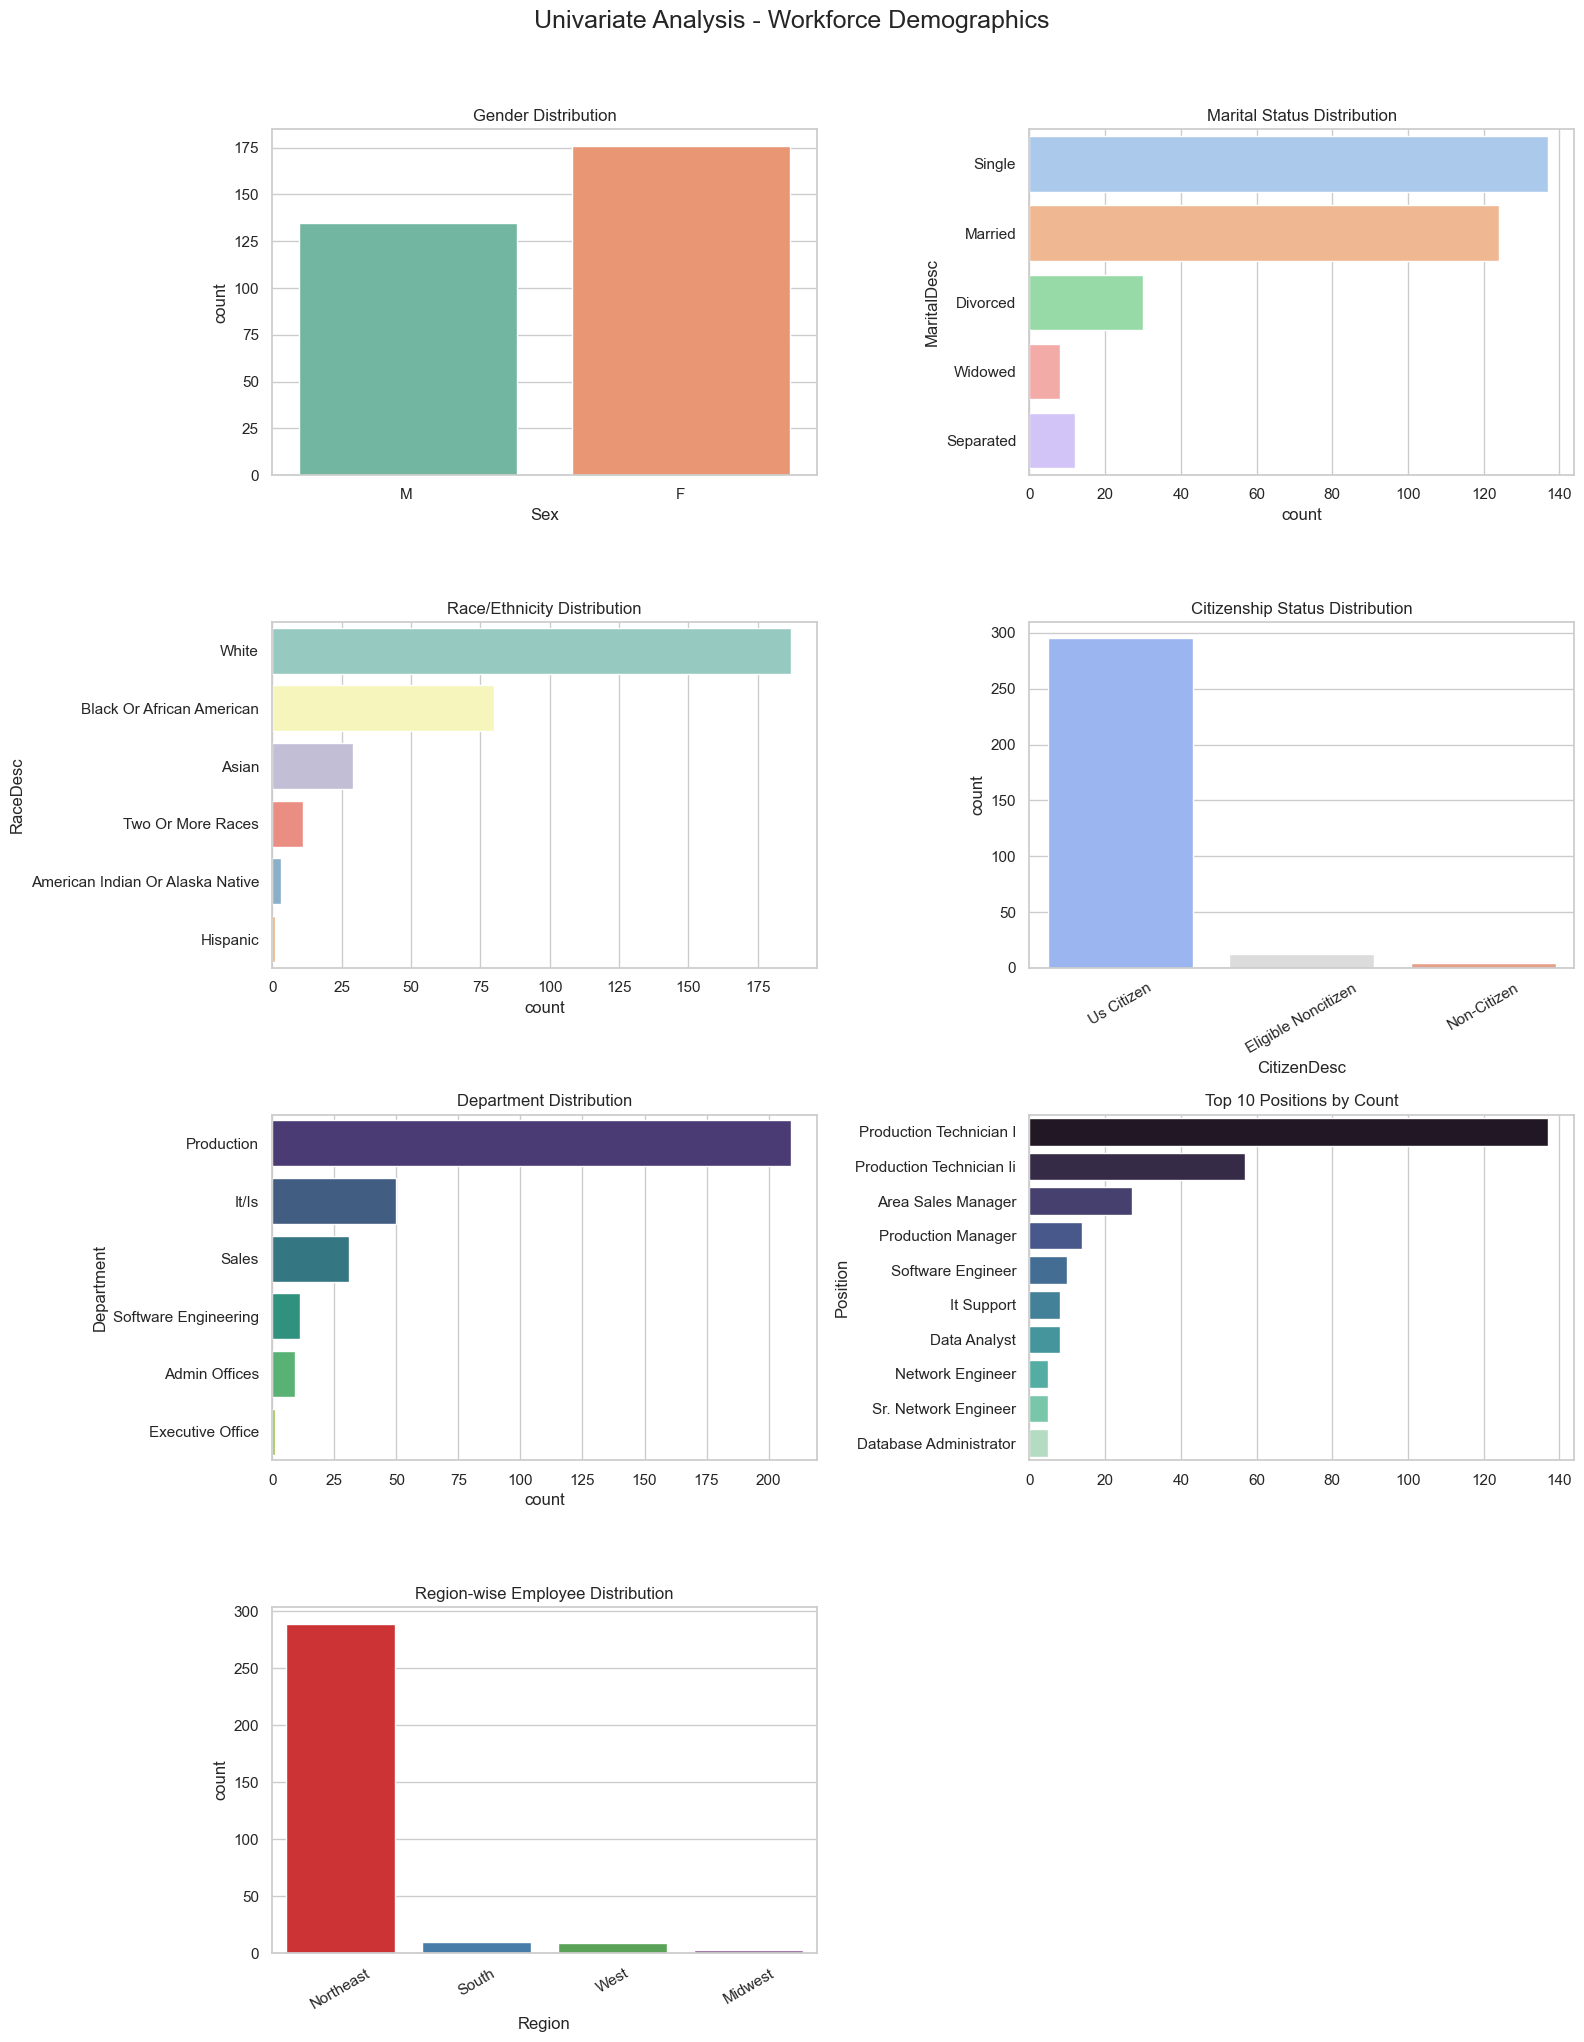

In [196]:


# Set style and figure size
sns.set(style="whitegrid")
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Univariate Analysis - Workforce Demographics', fontsize=18, y=1.02)

# Plot 1: Gender
sns.countplot(data=df, x='Sex', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Plot 2: Marital Status
sns.countplot(data=df, y='MaritalDesc', palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title('Marital Status Distribution')

# Plot 3: Race/Ethnicity
sns.countplot(data=df, y='RaceDesc', order=df['RaceDesc'].value_counts().index, palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Race/Ethnicity Distribution')

# Plot 4: Citizenship
sns.countplot(data=df, x='CitizenDesc', palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Citizenship Status Distribution')
axes[1, 1].tick_params(axis='x', rotation=30)

# Plot 5: Department
sns.countplot(data=df, y='Department', order=df['Department'].value_counts().index, palette='viridis', ax=axes[2, 0])
axes[2, 0].set_title('Department Distribution')

# Plot 6: Top 10 Positions
top_positions = df['Position'].value_counts().nlargest(10)
sns.barplot(y=top_positions.index, x=top_positions.values, palette='mako', ax=axes[2, 1])
axes[2, 1].set_title('Top 10 Positions by Count')

# Plot 7: Region
sns.countplot(data=df, x='Region', palette='Set1', ax=axes[3, 0])
axes[3, 0].set_title('Region-wise Employee Distribution')
axes[3, 0].tick_params(axis='x', rotation=30)

# Hide unused subplot (bottom right)
fig.delaxes(axes[3, 1])

plt.tight_layout()
plt.show()


**Insights**

+ Gender: Slightly more female employees than male, indicating a relatively balanced workforce.

+ Marital Status: Predominantly Single and Married employees; few in separated, widowed, or divorced categories.

+ Race/Ethnicity: Workforce is primarily White (60%), followed by Black or African American (25%); other racial groups are underrepresented, suggesting diversity improvement potential.

+ Citizenship: Over 94% are U.S. citizens, indicating a domestically focused workforce with minimal reliance on foreign talent.

+ Department Size: Production department has the highest headcount by a large margin, implying an operations-driven company structure.

+ Job Titles: Production Technician I & II are the most common roles, followed by technical and mid-management positions.

+ Region: Workforce is heavily concentrated in the Northeast, with minimal presence in other U.S. regions.

### Salary Distribution Analysis

Goal:To understand the salary range, central tendency, detect outliers, and compare compensation across roles, departments, and demographics.


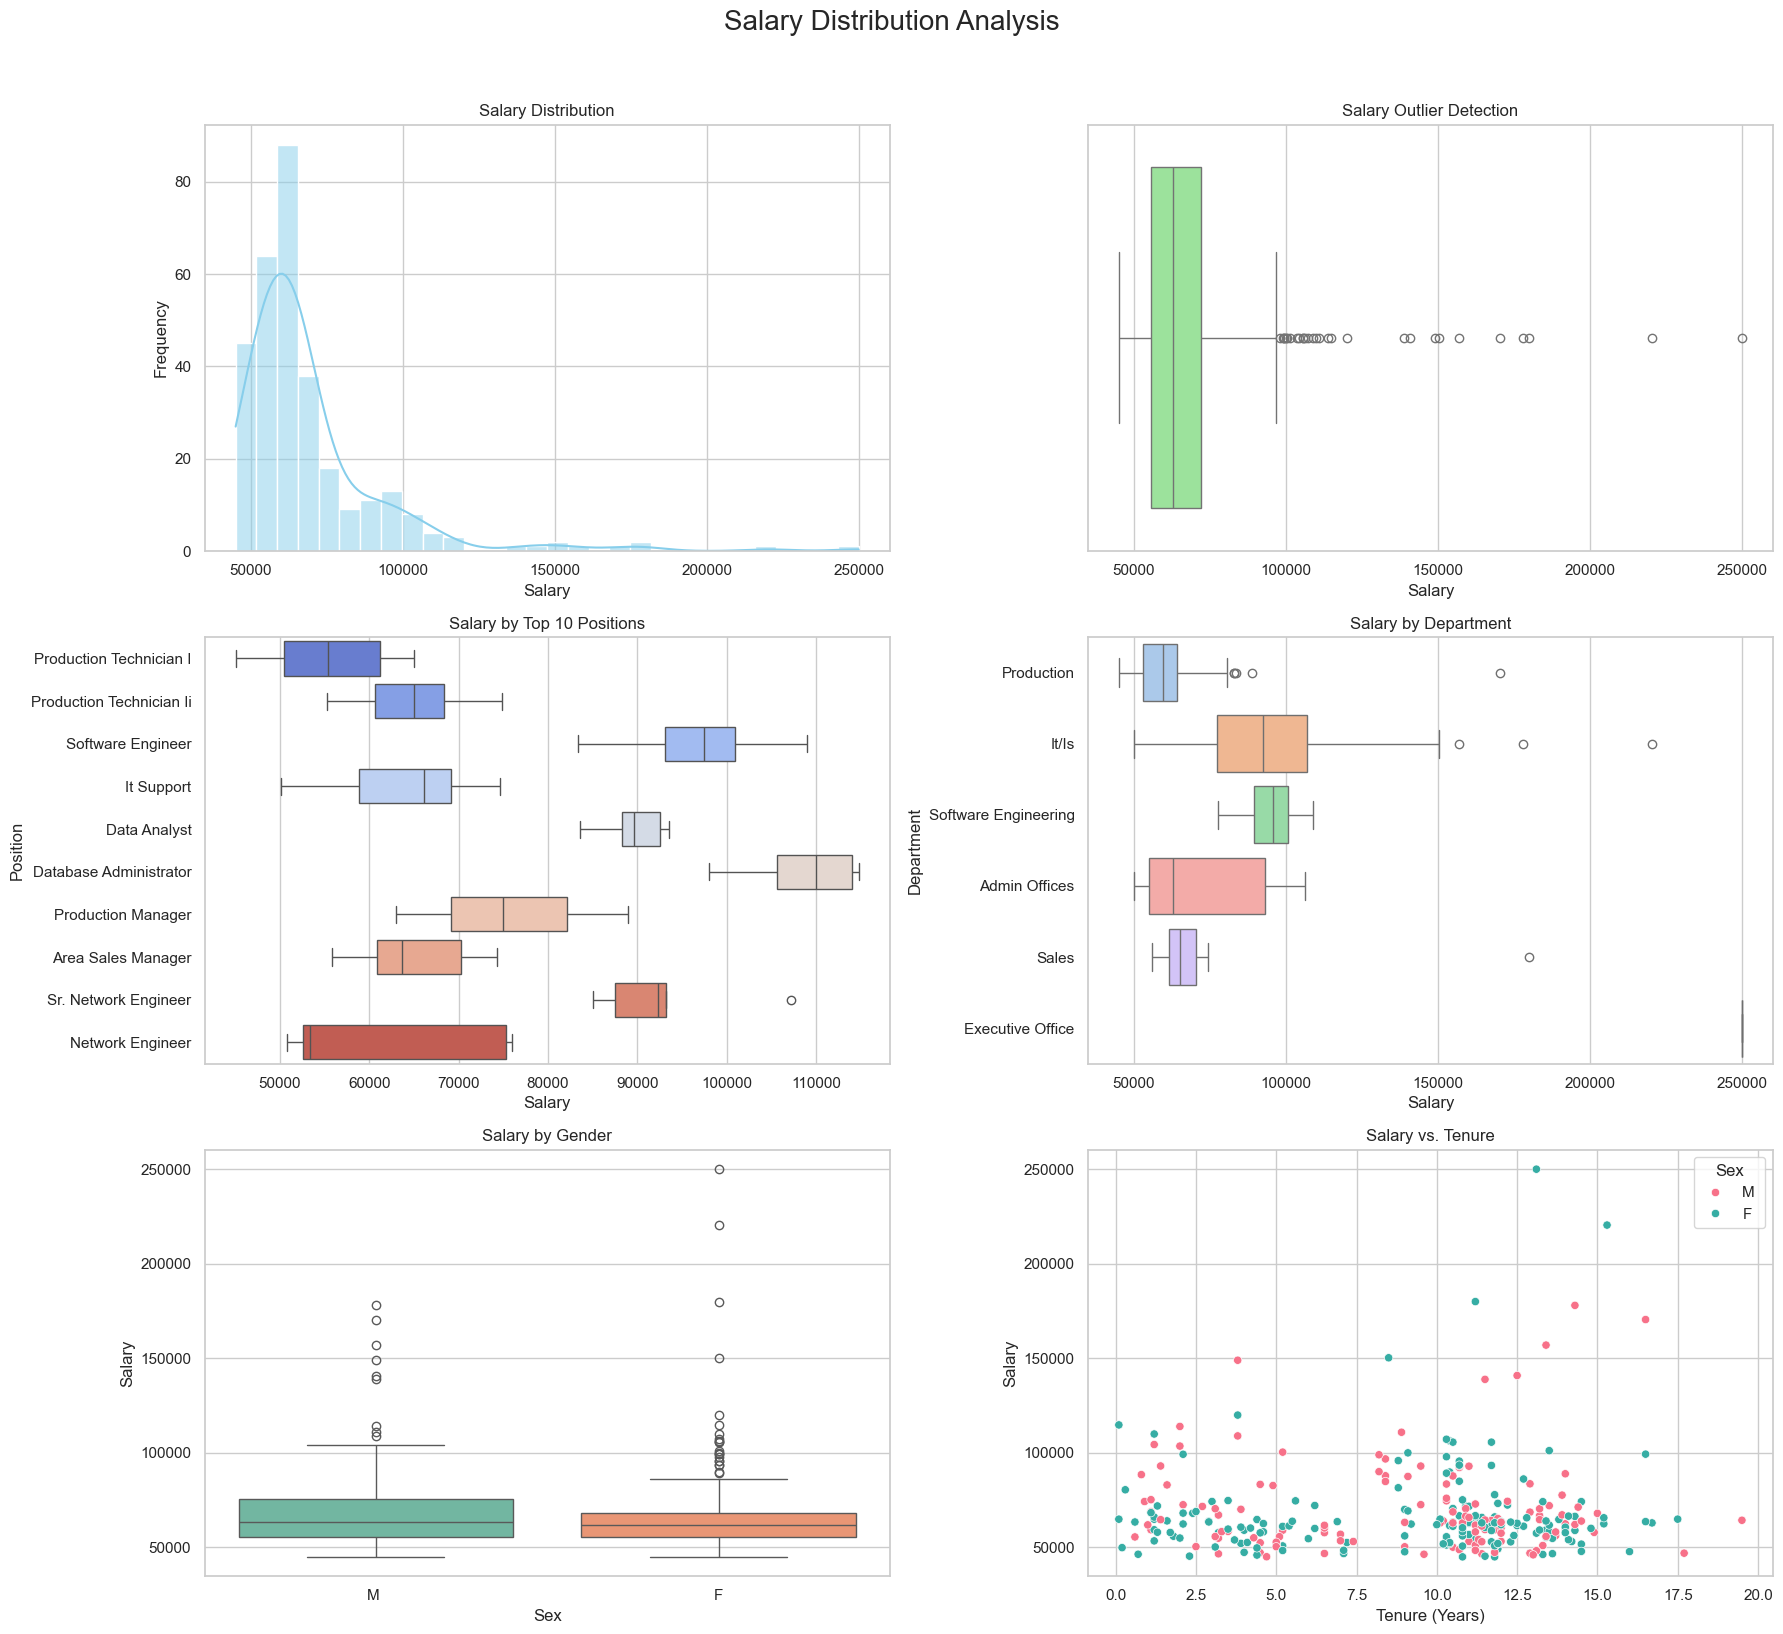

In [197]:
# Set style
sns.set(style="whitegrid")

# Create a 3x2 subplot layout
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
fig.suptitle('Salary Distribution Analysis', fontsize=20, y=1.02)

# Plot 1: Salary Histogram with KDE
sns.histplot(df['Salary'], kde=True, bins=30, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Salary Distribution')
axes[0, 0].set_xlabel('Salary')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Salary Boxplot (Outlier Detection)
sns.boxplot(x=df['Salary'], color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Salary Outlier Detection')
axes[0, 1].set_xlabel('Salary')

# Plot 3: Salary by Top 10 Positions
top_roles = df['Position'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['Position'].isin(top_roles)], x='Salary', y='Position', palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Salary by Top 10 Positions')
axes[1, 0].set_xlabel('Salary')
axes[1, 0].set_ylabel('Position')

# Plot 4: Salary by Department
sns.boxplot(data=df, x='Salary', y='Department', palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Salary by Department')
axes[1, 1].set_xlabel('Salary')
axes[1, 1].set_ylabel('Department')

# Plot 5: Salary by Gender
sns.boxplot(data=df, x='Sex', y='Salary', palette='Set2', ax=axes[2, 0])
axes[2, 0].set_title('Salary by Gender')
axes[2, 0].set_xlabel('Sex')
axes[2, 0].set_ylabel('Salary')

# Plot 6: Salary vs. Tenure
sns.scatterplot(data=df, x='TenureYears', y='Salary', hue='Sex', palette='husl', ax=axes[2, 1])
axes[2, 1].set_title('Salary vs. Tenure')
axes[2, 1].set_xlabel('Tenure (Years)')
axes[2, 1].set_ylabel('Salary')

# Adjust layout
plt.tight_layout()
plt.show()


### Salary Analysis Insights

**1. Overall Salary Distribution**
+ The salary distribution is right-skewed, with a large concentration of salaries between $50,000–$90,000.

+ A few high-income outliers (>$150,000) stretch the upper range, likely representing senior executives or niche technical roles.

**2. Outlier Detection**
+ Boxplot clearly shows a number of high-end salary outliers.

+ These are valid and likely reflect top-tier roles (e.g., CIO, Director-level, Architects) — but should be handled carefully in modeling.

**3. Salary by Top 10 Positions**
+ *Production Technician I & II* dominate in count and lie on the lower salary end (~$50K–$60K).

+ Mid to high-tier roles like *Network Engineer, Sr. Network Engineer*, and *Area Sales Manager* have broader salary ranges, indicating either:

    + Experience-based variation

    + Department-level budget differences

+ *Database Administrator* and *IT Support* show tighter, more controlled salary bands.

**4. Salary by Department**
+ *Executive Office* and *Sales* show the widest salary range — likely due to performance-based or tiered pay.

+ *Production* is the most populous department with lower, more consistent pay.

+ *IT/IS* and *Software Engineering* show broader mid-level salaries, as expected for tech roles.

**5. Salary by Gender**
+ Male and Female salary distributions are similar overall, but:

+ Females show more high-end outliers, indicating presence in higher-paid roles.

+ Median salaries appear roughly equal — suggesting no major gender gap, but deep-dive by role/level is advised.

**6. Salary vs. Tenure**
+ No strong linear trend — i.e., salary is not tightly correlated with tenure.

+ Some high-salary roles are held by individuals with less than 5 years of tenure, indicating:

+ External hires for senior roles

+ Promotions unrelated to tenure

+ Potential merit-based or skill-based compensation



### Salary Fairness

Goal: Explore the distribution of high-earning employees by gender, evaluate salary equity within senior leadership roles, and understand whether tenure plays a role in high compensation, particularly for female employees.

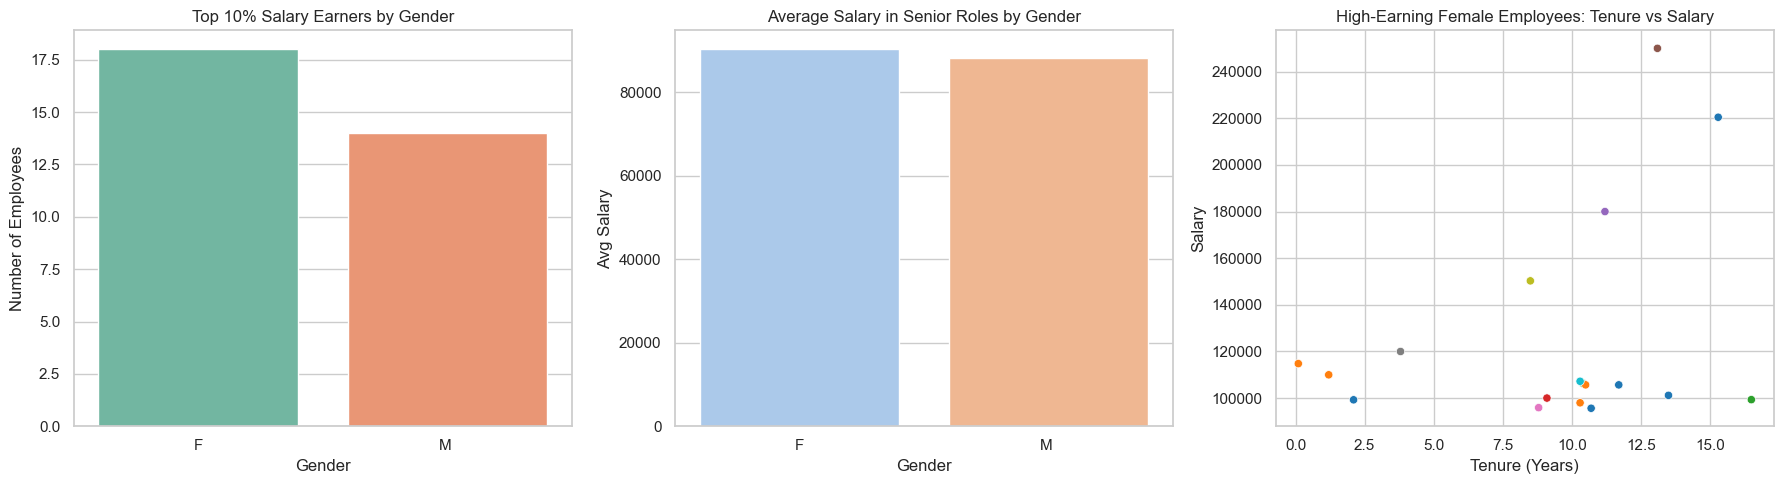

In [198]:


# --- 1. Top 10% Earners by Gender ---

# Calculate salary threshold
top_10_salary_cutoff = df['Salary'].quantile(0.90)
top_earners = df[df['Salary'] >= top_10_salary_cutoff]

# Gender count for top earners
top_gender_counts = top_earners['Sex'].value_counts().reset_index()
top_gender_counts.columns = ['Sex', 'Count']

# --- 2. Senior Role Salary Comparison by Gender ---

senior_keywords = ['Director', 'Manager', 'Architect', 'President', 'Executive', 'CIO']
senior_df = df[df['Position'].str.contains('|'.join(senior_keywords), case=False)]
senior_salary_gender = senior_df.groupby('Sex')['Salary'].agg(['mean', 'count']).reset_index()

# --- 3. Tenure vs Salary for High-Earning Females ---

female_top_earners = top_earners[top_earners['Sex'] == 'F']

# ---------- Plotting ----------
plt.figure(figsize=(18, 5))
sns.set(style='whitegrid')

# Plot 1: Top 10% earners by gender
plt.subplot(1, 3, 1)
sns.barplot(data=top_gender_counts, x='Sex', y='Count', palette='Set2')
plt.title('Top 10% Salary Earners by Gender')
plt.ylabel('Number of Employees')
plt.xlabel('Gender')

# Plot 2: Avg salary in senior roles by gender
plt.subplot(1, 3, 2)
sns.barplot(data=senior_salary_gender, x='Sex', y='mean', palette='pastel')
plt.title('Average Salary in Senior Roles by Gender')
plt.ylabel('Avg Salary')
plt.xlabel('Gender')

# Plot 3: Tenure vs Salary for high-earning females
plt.subplot(1, 3, 3)
sns.scatterplot(data=female_top_earners, x='TenureYears', y='Salary', hue='Position', palette='tab10', legend=False)
plt.title('High-Earning Female Employees: Tenure vs Salary')
plt.xlabel('Tenure (Years)')
plt.ylabel('Salary')


plt.tight_layout()
plt.show()


### Insights:

**1. Top Earners Representation**
+ Female employees make up a larger share of the top 10% salary earners, indicating strong representation in high-paying roles.

**2. Senior Roles Compensation**
+ In senior positions, women earn slightly higher average salaries than men, suggesting equitable or even favorable compensation practices.

**3. Tenure vs. Salary (for High-Earning Females)**
→ High-earning women have a wide range of tenure, implying a mix of experienced internal promotions and strategic external hires.

The organization demonstrates strong gender equity in pay, especially in senior roles. Compensation appears to be role-driven rather than solely tenure-based, and women are both recognized and rewarded at the top of the pay scale.

### Age Distribution Analysis

Goal:Understand the age composition of the workforce, detect skewness or bias in age groups, and explore how age relates to salary, tenure, and performance.




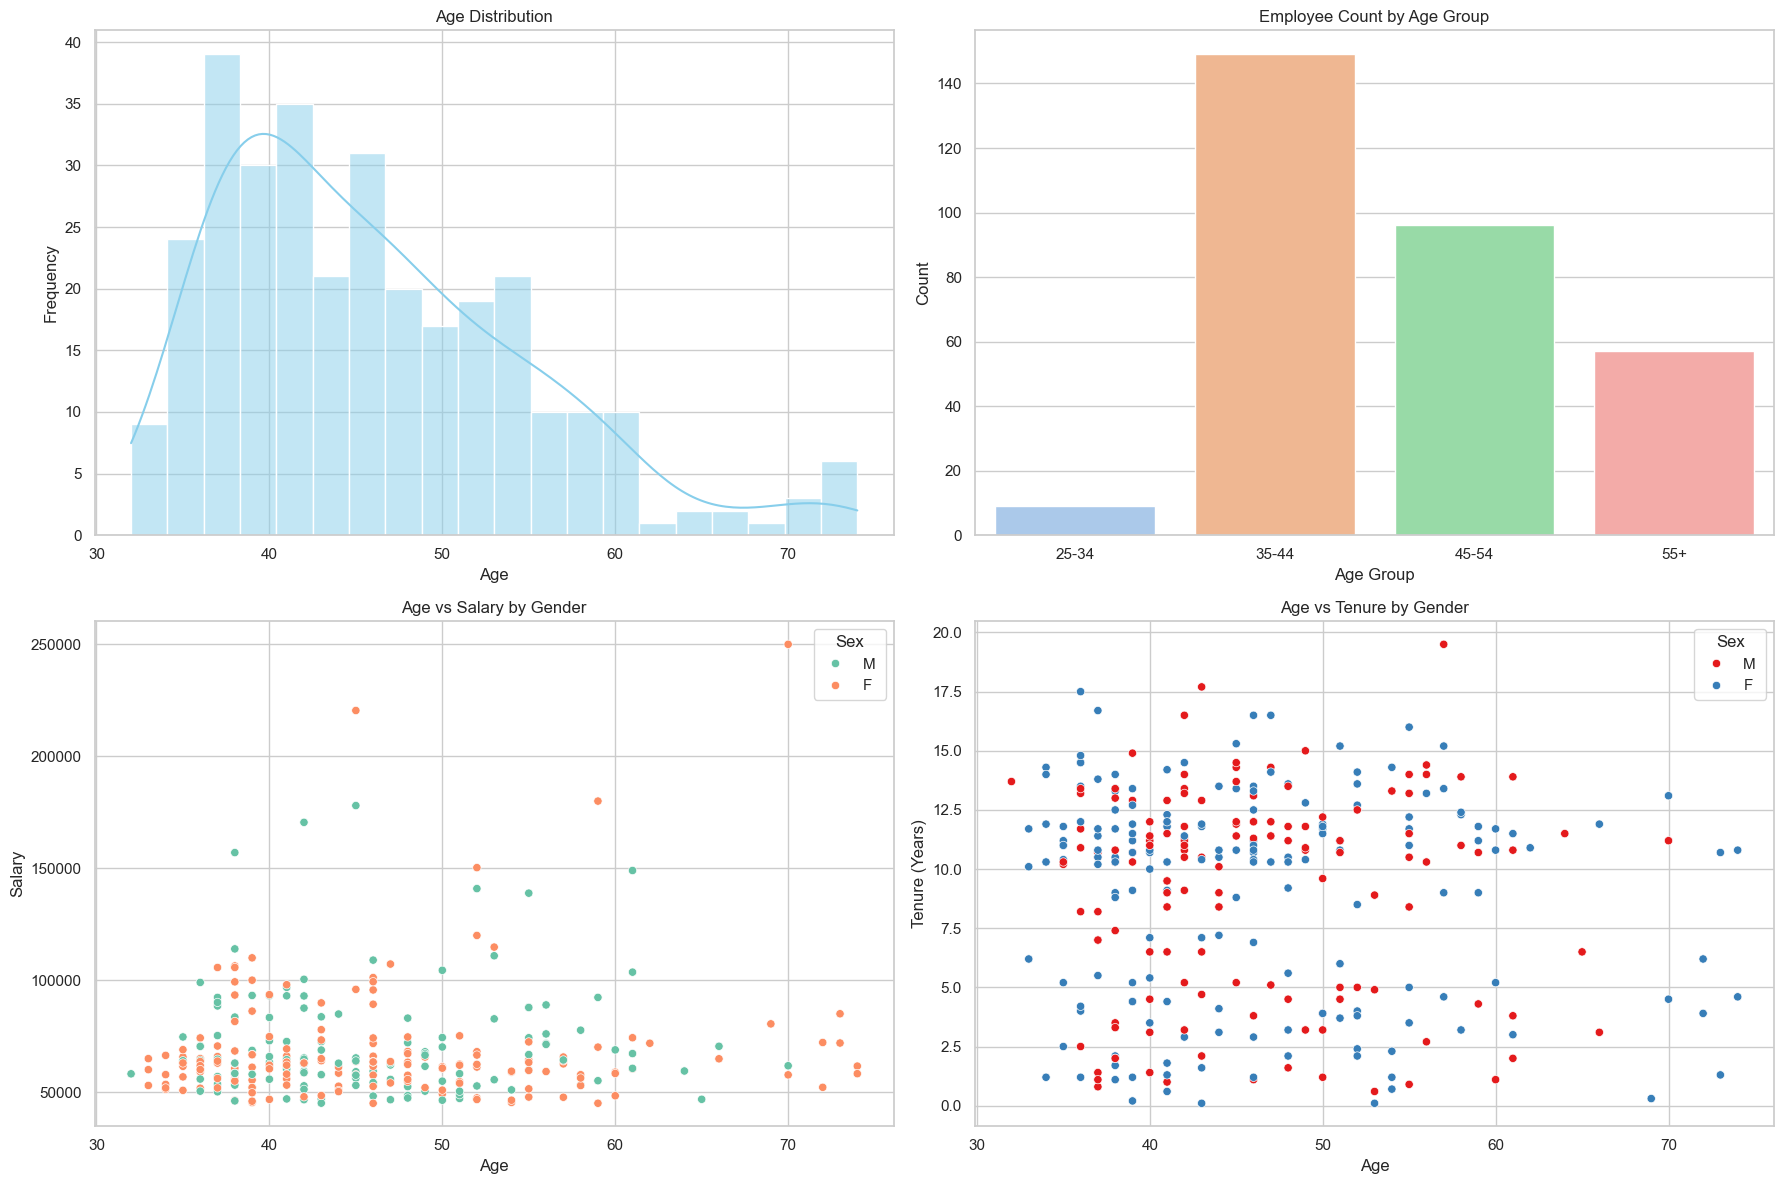

In [199]:
# Define age bins
bins = [25, 35, 45, 55, 100]
labels = ['25-34', '35-44', '45-54', '55+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Plotting
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")

# 1. Age Distribution Histogram
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. Age Group Countplot
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='AgeGroup', order=labels, palette='pastel')
plt.title('Employee Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# 3. Age vs Salary
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Age', y='Salary', hue='Sex', palette='Set2')
plt.title('Age vs Salary by Gender')
plt.xlabel('Age')
plt.ylabel('Salary')

# 4. Age vs Tenure
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Age', y='TenureYears', hue='Sex', palette='Set1')
plt.title('Age vs Tenure by Gender')
plt.xlabel('Age')
plt.ylabel('Tenure (Years)')

plt.tight_layout()
plt.show()


### Age Distribution Insights:

**1. Workforce Age Profile**

+ Most employees fall in the 35–54 age range, indicating a mid-career dominant workforce.

+ Very few employees are under 35, suggesting low representation of young professionals.

**2. Salary Trends by Age & Gender**

+ High salaries (above ₹150K) are mostly found in the 40–60 age range.

+ Both male and female employees are present among top earners, with females slightly leading in high-end outliers.

**3. Tenure Patterns by Age & Gender**

+ Tenure generally increases with age, but there are also younger employees with long tenure and older employees with short tenure, implying early joiners and recent senior hires.

**4. Actionable Insights**

+ Consider investing in early-career talent programs.

+ Plan for succession and knowledge transfer from older employees.

+ Maintain and monitor the encouraging trend of gender pay equity.



### Tenure Distribution Analysis

Goal:Explore how long employees have stayed at the company, and identify patterns based on demographics, salary, or termination status.

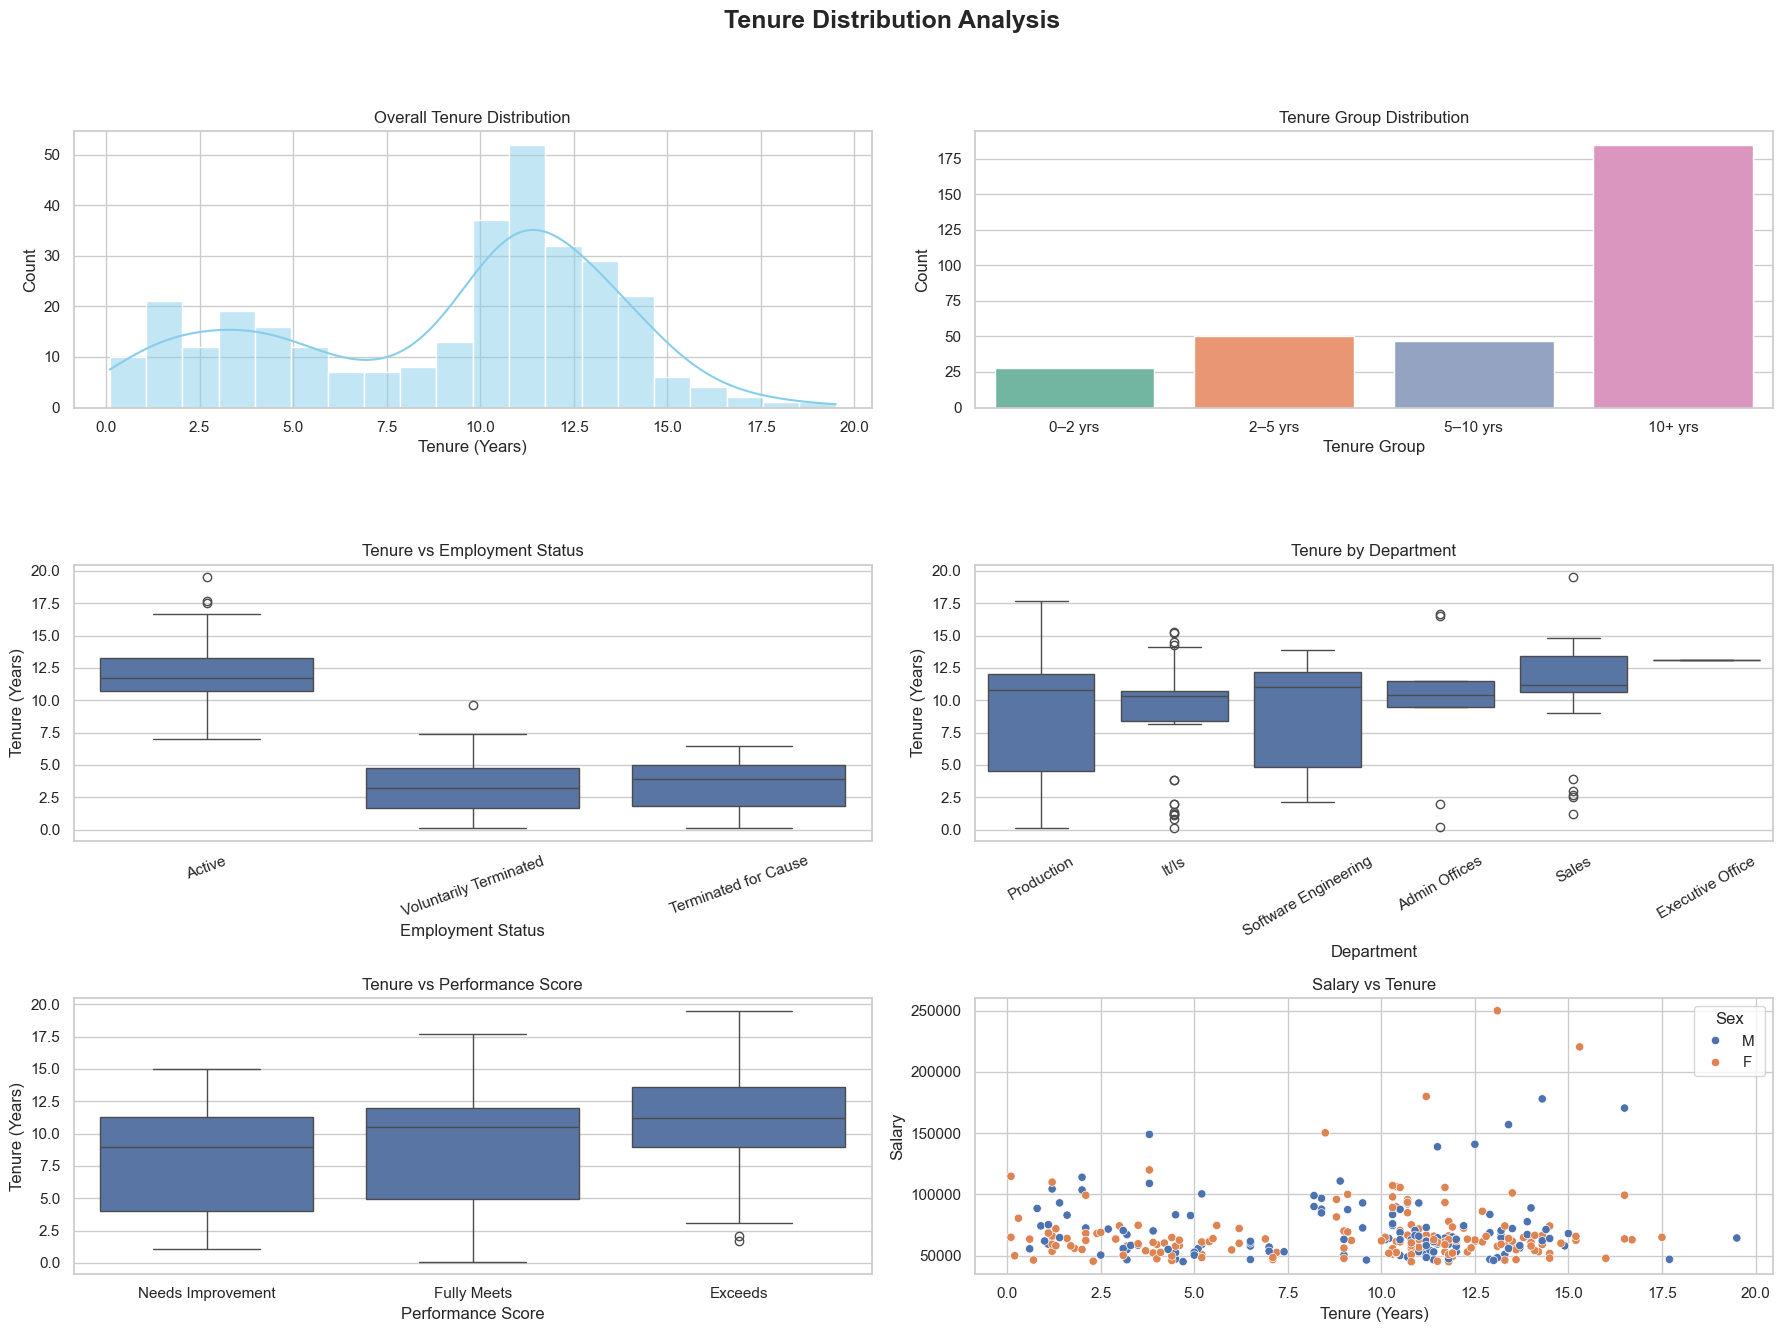

In [200]:

# Set style
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle("Tenure Distribution Analysis", fontsize=18, weight='bold')

# 1. Tenure Histogram
sns.histplot(df['TenureYears'], kde=True, bins=20, ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Overall Tenure Distribution")
axes[0,0].set_xlabel("Tenure (Years)")
axes[0,0].set_ylabel("Count")

# 2. Tenure Group Counts
bins = [0, 2, 5, 10, df['TenureYears'].max()]
labels = ['0–2 yrs', '2–5 yrs', '5–10 yrs', '10+ yrs']
df['TenureGroup'] = pd.cut(df['TenureYears'], bins=bins, labels=labels, right=False)
sns.countplot(data=df, x='TenureGroup', order=labels, ax=axes[0,1], palette='Set2')
axes[0,1].set_title("Tenure Group Distribution")
axes[0,1].set_xlabel("Tenure Group")
axes[0,1].set_ylabel("Count")

# 3. Tenure vs Employment Status
sns.boxplot(data=df, x='EmploymentStatus', y='TenureYears', ax=axes[1,0])
axes[1,0].set_title("Tenure vs Employment Status")
axes[1,0].set_xlabel("Employment Status")
axes[1,0].set_ylabel("Tenure (Years)")
axes[1,0].tick_params(axis='x', rotation=20)

# 4. Tenure vs Department
sns.boxplot(data=df, x='Department', y='TenureYears', ax=axes[1,1])
axes[1,1].set_title("Tenure by Department")
axes[1,1].set_xlabel("Department")
axes[1,1].set_ylabel("Tenure (Years)")
axes[1,1].tick_params(axis='x', rotation=30)

# 5. Tenure vs PerformanceScore
sns.boxplot(data=df, x='PerformanceScore', y='TenureYears', ax=axes[2,0])
axes[2,0].set_title("Tenure vs Performance Score")
axes[2,0].set_xlabel("Performance Score")
axes[2,0].set_ylabel("Tenure (Years)")

# 6. Tenure vs Salary
sns.scatterplot(data=df, x='TenureYears', y='Salary', hue='Sex', ax=axes[2,1])
axes[2,1].set_title("Salary vs Tenure")
axes[2,1].set_xlabel("Tenure (Years)")
axes[2,1].set_ylabel("Salary")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Tenure Distribution Analysis Dashboard:

**1. Overall Tenure Distribution**
+ The tenure distribution is right-skewed, peaking around 10–12 years, which indicates a relatively tenured workforce.

+ Very few employees have <2 years of experience, suggesting low recent hiring or high early attrition.

**2. Tenure Group Distribution**
+ A majority of employees (nearly 60%) fall into the 10+ years group, showing strong retention.

+ Only a small portion (about 10%) are in the 0–2 years category — an indicator of either low onboarding or high early turnover.

**3. Tenure vs Employment Status**
+ Active employees have the highest tenure, typically 10+ years.

+ Voluntarily terminated and terminated for cause employees mostly left within their first 5 years, pointing to early-stage exits being more common than long-term ones.

**4. Tenure by Department**
+ Sales, Executive Office, and Admin Offices have slightly higher median tenure.

+ IT/IS shows a shorter tenure range, which could suggest higher turnover or mobility in tech roles.

+ Outliers in multiple departments indicate a mix of new and legacy employees.

**5. Tenure vs Performance Score**
+ Employees with “Exceeds Expectations” and “Fully Meets” tend to have longer tenures.

+ Those who “Need Improvement” show a wider and more random spread, hinting that performance may stabilize with tenure, but not always.

**6. Salary vs Tenure (by Gender)**
+ There is no linear salary growth with tenure.

+ However, high salaries (above ₹150k–₹250k) are often associated with tenure >10 years, showing that longevity aligns with seniority & pay scale.

+ Both men and women are represented in high tenure & salary, with some female outliers on the upper end.

# Department vs. Satisfaction

Goal:To identify which departments have higher or lower average employee satisfaction, helping HR understand where engagement interventions may be needed.

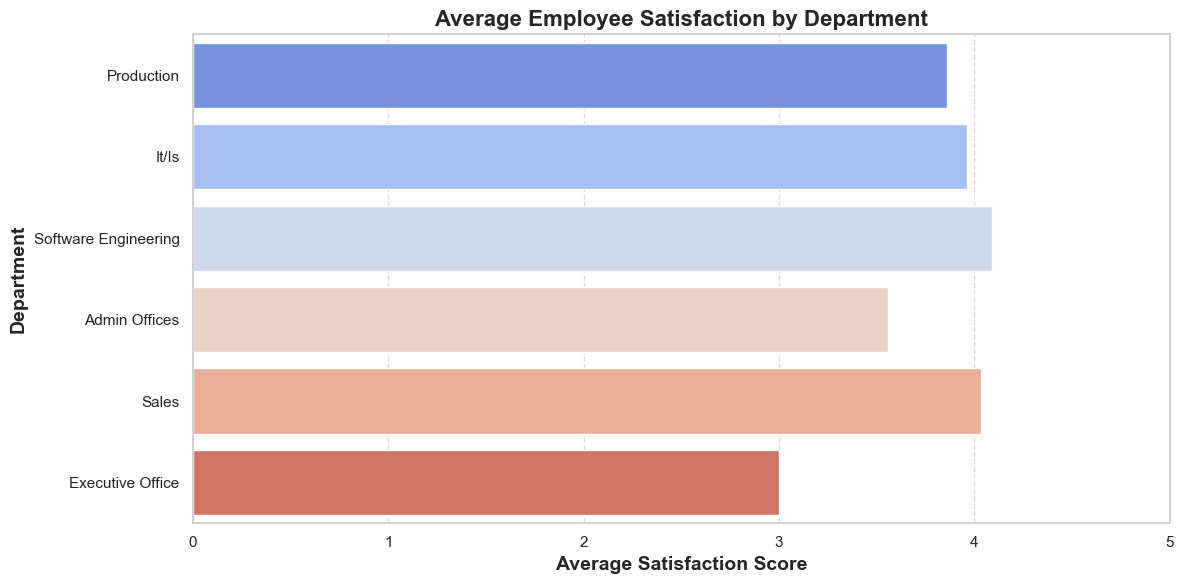

In [201]:

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='EmpSatisfaction',
    y='Department',
    estimator='mean',
    ci=None,
    palette='coolwarm',
    orient='h'
)
plt.title('Average Employee Satisfaction by Department',fontsize=16, weight='bold')
plt.xlabel('Average Satisfaction Score',fontsize=14, weight='bold')
plt.ylabel('Department',fontsize=14, weight='bold')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Insights:
+ Software Engineering has the highest satisfaction — indicating a positive environment, growth opportunities, and likely high engagement.

+ Sales and IT/IS also show strong satisfaction scores, suggesting healthy work dynamics and employee morale.

+ Production and Admin Offices have moderate satisfaction, potentially due to repetitive tasks or limited advancement.

+ Executive Office shows the lowest satisfaction, which could stem from stress, role isolation, or unmet expectations.

### Absences vs. Performance 

Goal:To explore the relationship between employee absences and their performance scores to identify potential productivity or discipline concerns.

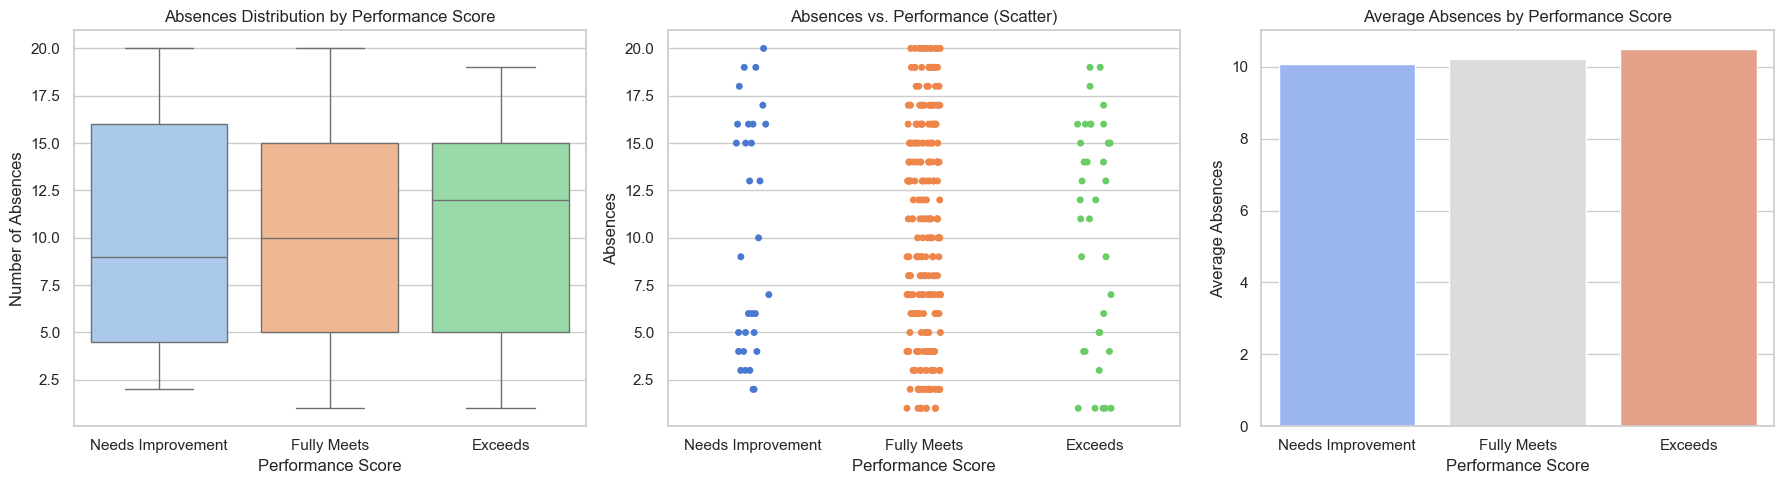

In [202]:
# Assuming your DataFrame is named df
plt.figure(figsize=(18, 5))

# 1. Boxplot: Absences per Performance Rating
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='PerformanceScore', y='Absences', palette='pastel')
plt.title('Absences Distribution by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Number of Absences')

# 2. Scatter plot: Absences vs. Performance
plt.subplot(1, 3, 2)
sns.stripplot(data=df, x='PerformanceScore', y='Absences', jitter=True, palette='muted')
plt.title('Absences vs. Performance (Scatter)')
plt.xlabel('Performance Score')
plt.ylabel('Absences')

# 3. Barplot: Average Absences by Performance Score
plt.subplot(1, 3, 3)
avg_absences = df.groupby('PerformanceScore')['Absences'].mean().reset_index()
sns.barplot(data=avg_absences, x='PerformanceScore', y='Absences', palette='coolwarm')
plt.title('Average Absences by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Average Absences')

plt.tight_layout()
plt.show()


### Insights:
+ Top performers ("Exceeds Expectations") have the highest average absences, followed by "Fully Meets" and then "Needs Improvement".

+ Absence variability is high across all groups, especially among top performers.

+ Outliers with high absences are present in every performance category.

+ No clear negative correlation between absences and performance — good performers can also have frequent absences.

+ This suggests that absenteeism doesn’t necessarily reflect poor performance and may be influenced by job role, flexibility, or other factors.

### Race vs. PerformanceScor

Goal:Analyze how performance scores vary across different racial groups to identify any patterns or disparities.

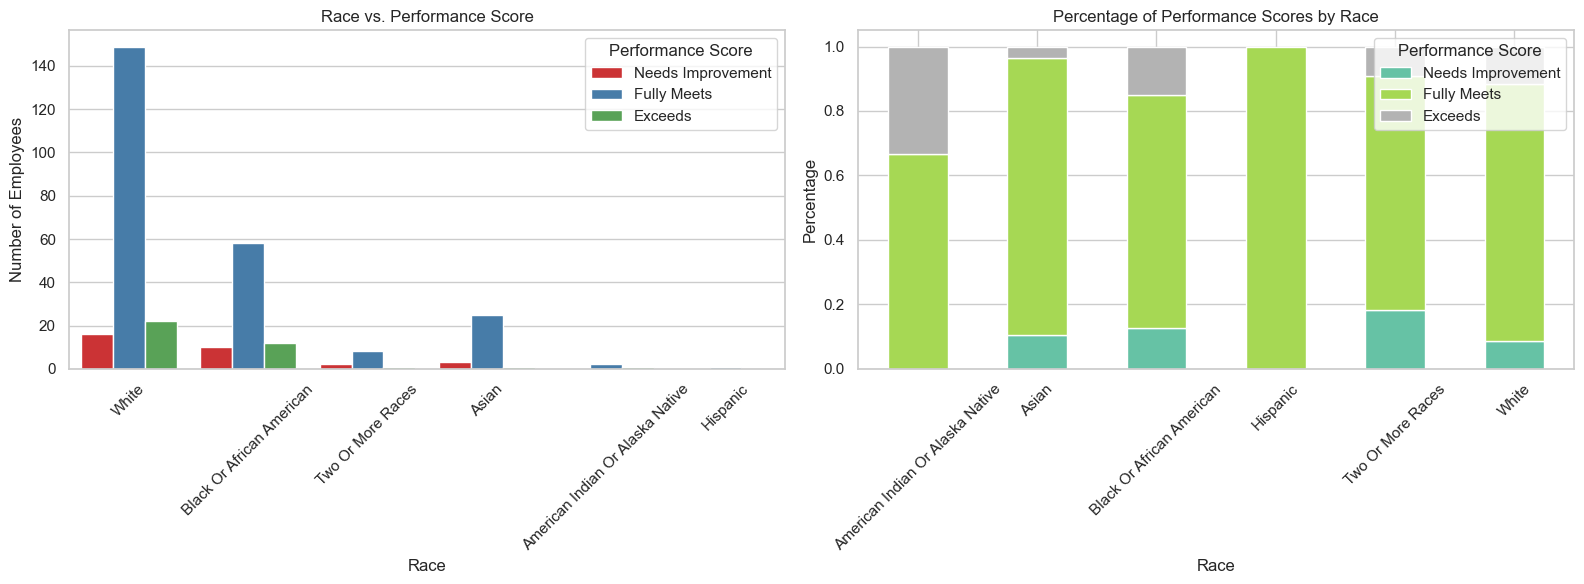

In [203]:
# Crosstab of Race vs. PerformanceScore (counts)
race_perf = pd.crosstab(df['RaceDesc'], df['PerformanceScore'])

# Normalize for percentage chart
race_perf_pct = race_perf.div(race_perf.sum(axis=1), axis=0)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Count-based stacked bar chart
sns.countplot(data=df, x='RaceDesc', hue='PerformanceScore', ax=axes[0], palette='Set1')
axes[0].set_title('Race vs. Performance Score')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Number of Employees')
axes[0].legend(title='Performance Score', loc='upper right')
axes[0].tick_params(axis='x', rotation=45)

# 2. Percentage-based stacked bar chart
race_perf_pct.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set2')
axes[1].set_title('Percentage of Performance Scores by Race')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='Performance Score', loc='upper right')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



### Insights:
+ The majority of employees across all races are rated as "Fully Meets" expectations.

+ White and Black or African American employees form the largest racial groups and also have higher counts in the "Exceeds" category.

+ Smaller racial groups (e.g., Asian, Hispanic, Two or More Races) show varied performance patterns, but proportions may be affected by small sample sizes.

+ A few groups (e.g., Asian, Two or More Races) have relatively higher percentages in the "Needs Improvement" category.

+ The analysis indicates consistent performance ratings overall, but highlights potential areas for further review in equity and development opportunities.

### EngagementSurvey vs. Satisfaction

Goal: To understand the relationship between employee engagement (how involved and committed they feel) and their satisfaction level.

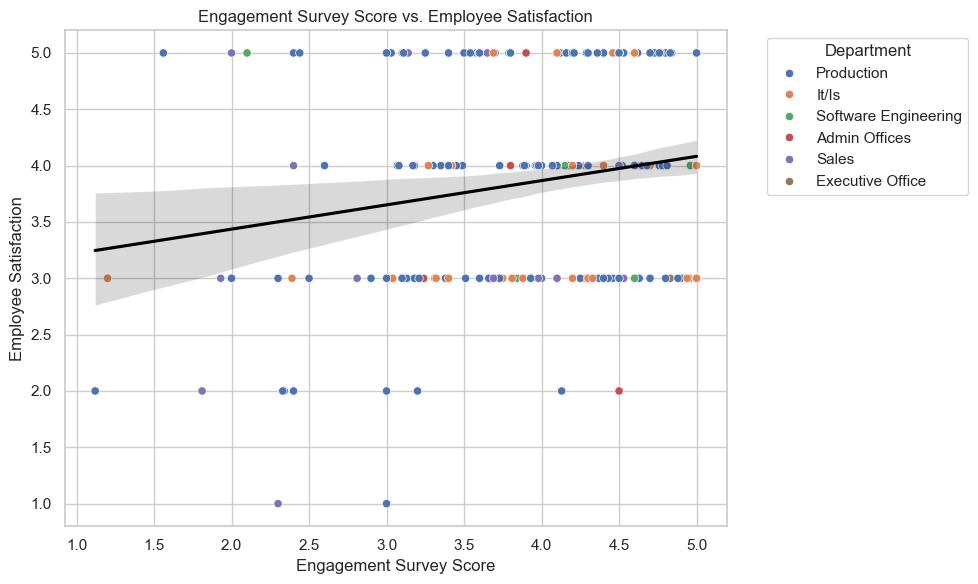

In [204]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='EngagementSurvey', y='EmpSatisfaction', hue='Department')
sns.regplot(data=df, x='EngagementSurvey', y='EmpSatisfaction', scatter=False, color='black')
plt.title('Engagement Survey Score vs. Employee Satisfaction')
plt.xlabel('Engagement Survey Score')
plt.ylabel('Employee Satisfaction')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





### Insights
+ There is a slight positive correlation between engagement and satisfaction — higher engagement generally aligns with higher satisfaction.

+ Most employees report maximum satisfaction (5.0), even across varying engagement levels.

+ Satisfaction varies more at lower engagement scores, indicating mixed experiences among less engaged employees.

+ All departments show a similar pattern, suggesting this trend is consistent across the organization.

+ A few outliers (low satisfaction despite high engagement) may need individual or team-level attention.

### Termination Category vs. Engagement Score

Goal:Focus on how engagement relates to different termination outcomes — useful for understanding retention patterns.


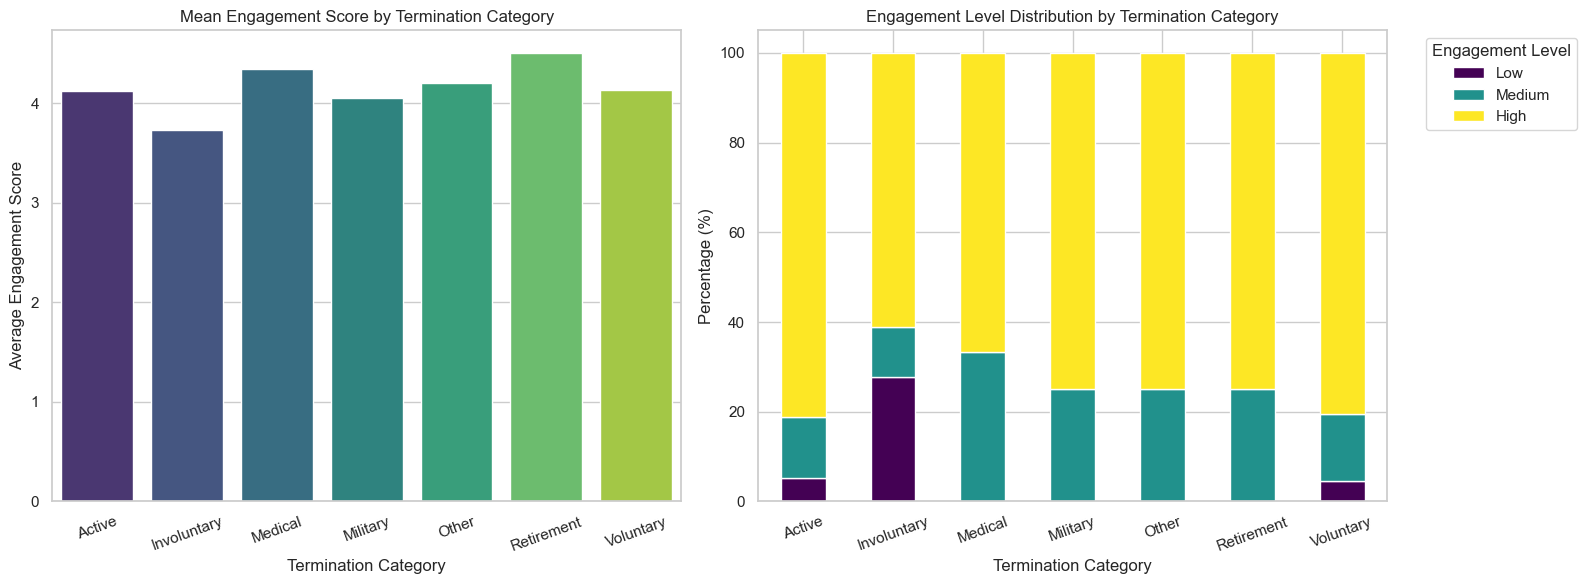

In [205]:
# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['TerminationCategory', 'EngagementSurvey'])

# Set style
sns.set(style="whitegrid")

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# -----------------------------
# 1. Grouped Bar Chart (Mean Engagement by Termination Category)
mean_engagement = df_clean.groupby('TerminationCategory')['EngagementSurvey'].mean().reset_index()
sns.barplot(data=mean_engagement, x='TerminationCategory', y='EngagementSurvey', palette="viridis", ax=axes[0])
axes[0].set_title('Mean Engagement Score by Termination Category')
axes[0].set_ylabel('Average Engagement Score')
axes[0].set_xlabel('Termination Category')
axes[0].tick_params(axis='x', rotation=20)

# -----------------------------
# 2. Percentage Stacked Bar Chart (Engagement score binned)
df_clean['EngagementBin'] = pd.cut(df_clean['EngagementSurvey'], bins=[0, 2.5, 3.5, 5], labels=['Low', 'Medium', 'High'])

# Cross-tab for stacked chart
engagement_ct = pd.crosstab(df_clean['TerminationCategory'], df_clean['EngagementBin'], normalize='index') * 100
engagement_ct.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[1])

axes[1].set_title('Engagement Level Distribution by Termination Category')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('Termination Category')
axes[1].legend(title='Engagement Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


### Termination Category vs. Engagement Insights
+ Involuntary terminations have the lowest average engagement and the highest share of low-engaged employees, indicating disengagement is a strong factor in forced exits.

+ Voluntary terminations mostly involve highly engaged employees, suggesting organizations may be losing valuable talent due to unmet expectations or better external opportunities.

+ Retirement, Medical, and Military exits are associated with high engagement, implying these terminations are largely unrelated to dissatisfaction.

+ Active employees show moderate-to-high engagement, with minimal low engagement levels, indicating a generally satisfied current workforce.

### Retention Takeaways:
+ Focus on improving engagement to reduce involuntary turnover.

+ Develop strategies (e.g., growth opportunities, recognition) to retain high-performing employees who might exit voluntarily.

+ Use engagement scores as an early warning system for potential attrition.

## Attrition & Termination Analysis

### Who Left?
Goal: Filter and explore the characteristics of employees who have left the company to identify attrition patterns.

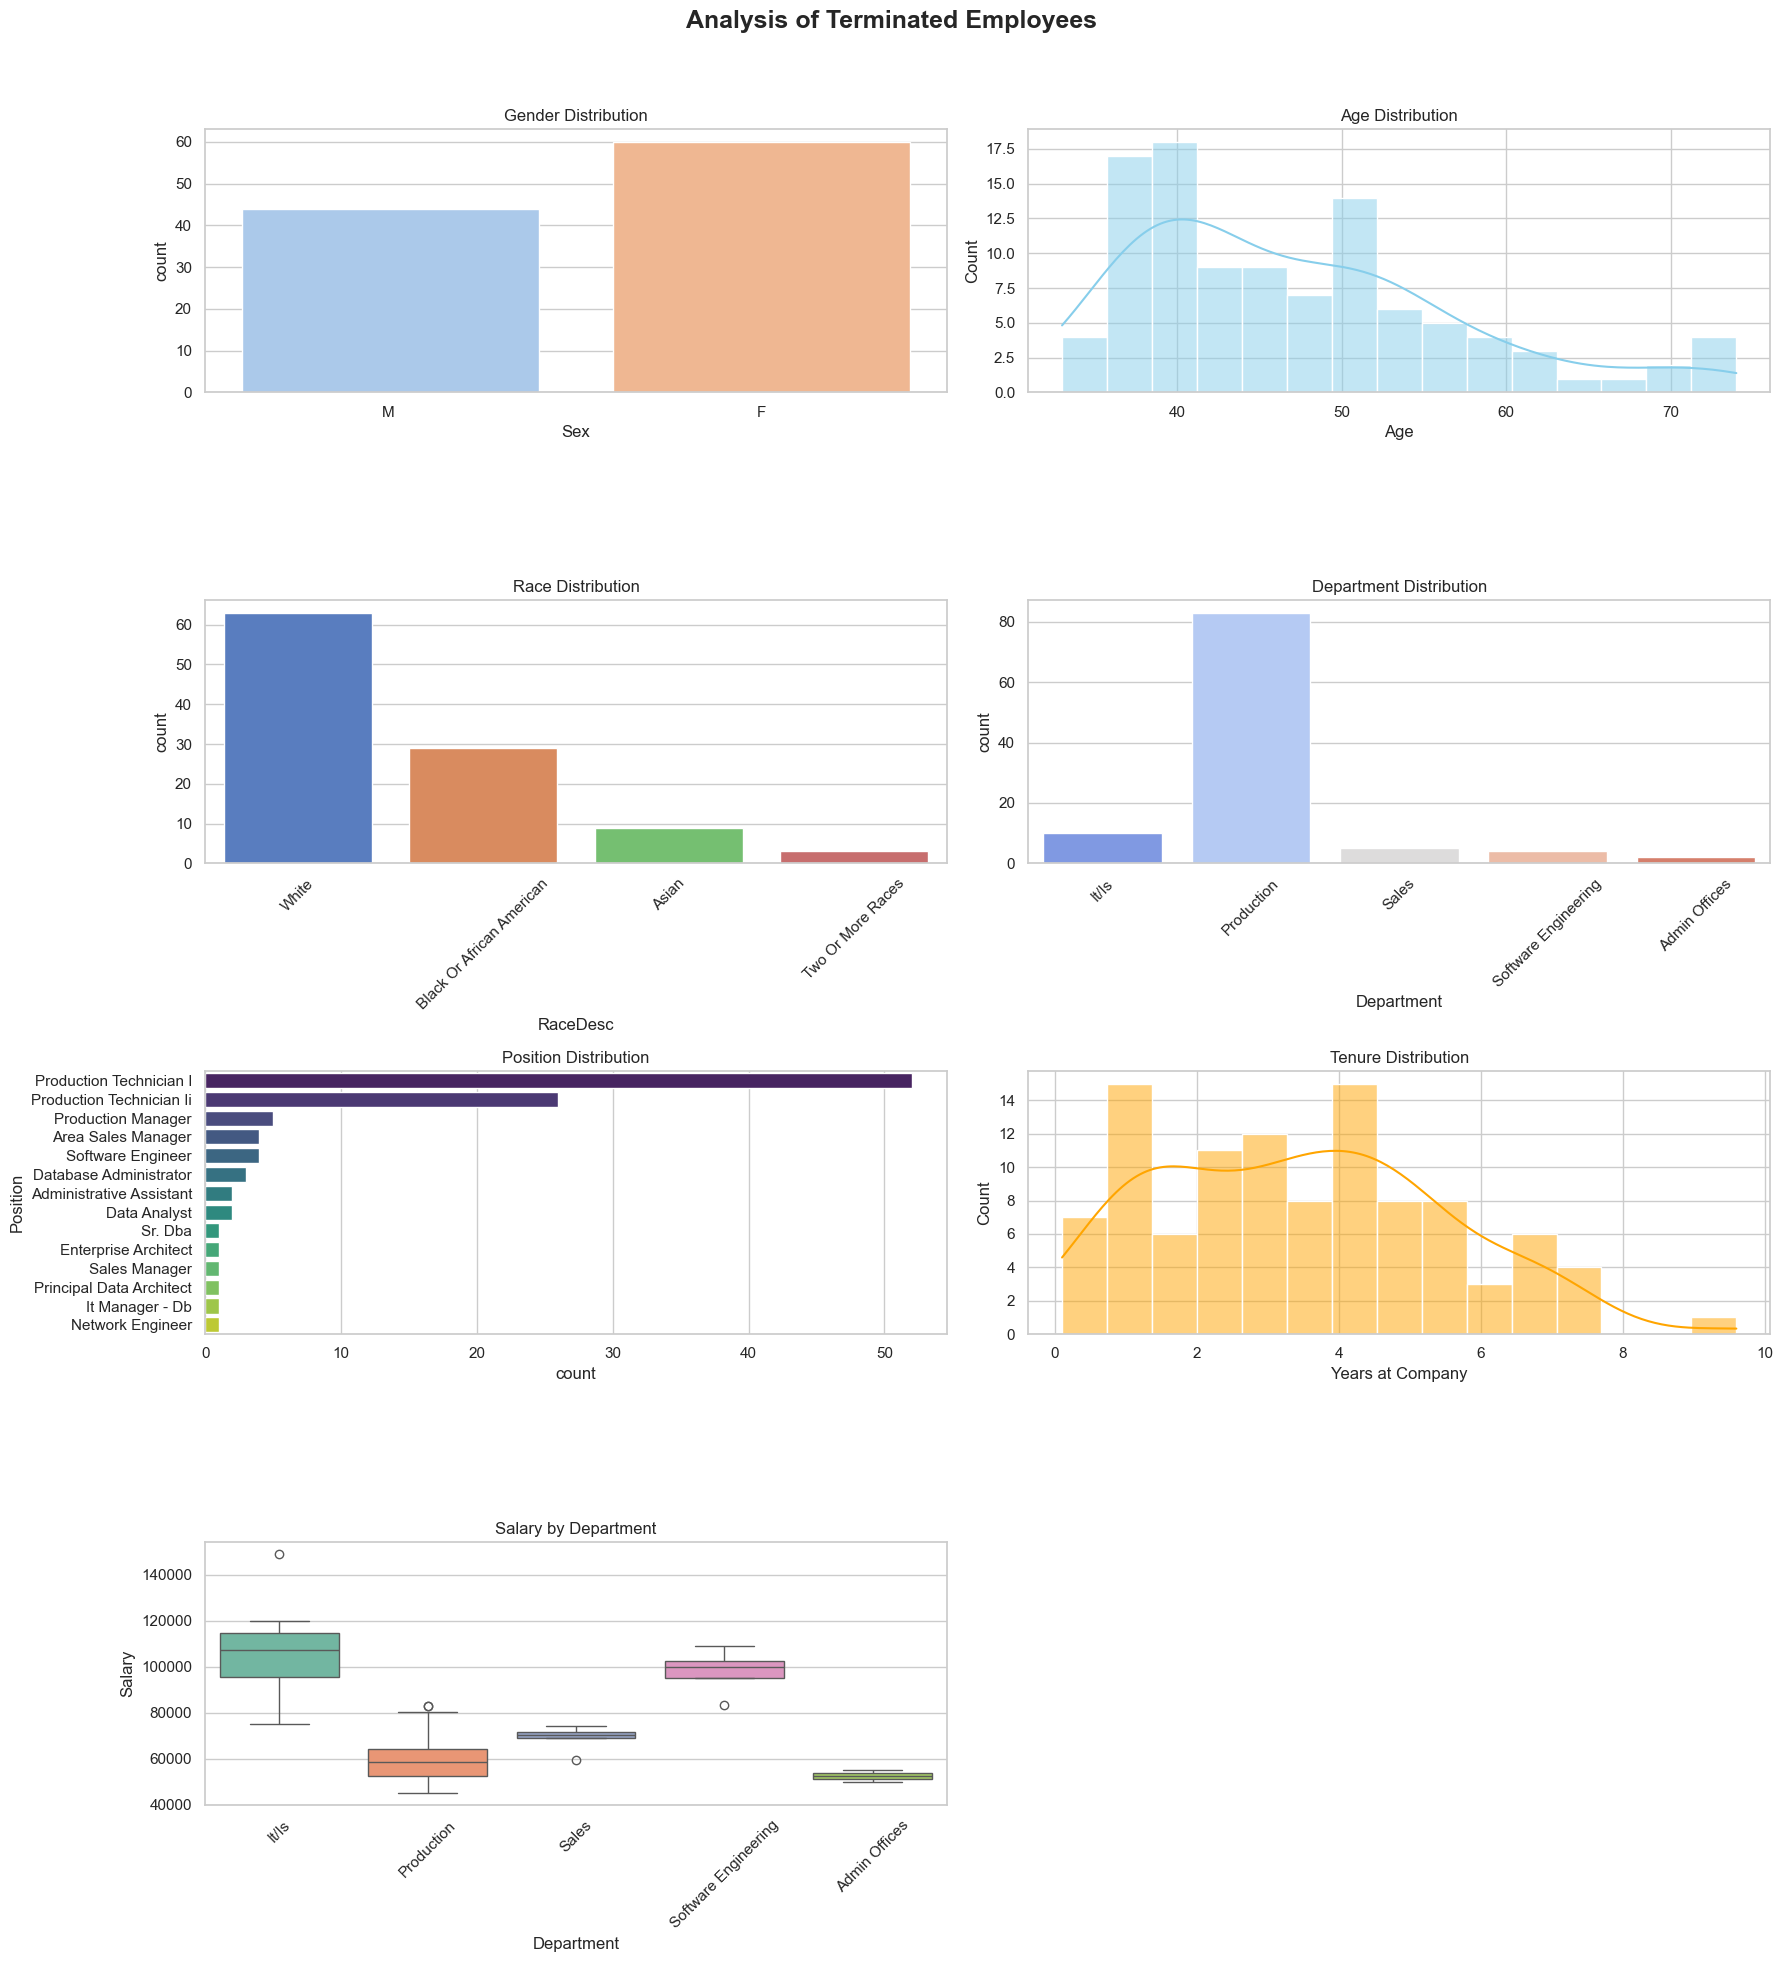

In [207]:
# Set up plotting style
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

# Filter terminated employees
terminated_df = df[df['Is_Terminated'] == True]

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle('Analysis of Terminated Employees', fontsize=18, fontweight='bold')

# Plot 1: Gender Distribution
sns.countplot(data=terminated_df, x='Sex', palette='pastel', ax=axs[0, 0])
axs[0, 0].set_title('Gender Distribution')

# Plot 2: Age Distribution
sns.histplot(terminated_df['Age'], kde=True, bins=15, color='skyblue', ax=axs[0, 1])
axs[0, 1].set_title('Age Distribution')
axs[0, 1].set_xlabel('Age')

# Plot 3: Race Distribution
sns.countplot(data=terminated_df, x='RaceDesc', palette='muted', ax=axs[1, 0])
axs[1, 0].set_title('Race Distribution')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Department Distribution
sns.countplot(data=terminated_df, x='Department', palette='coolwarm', ax=axs[1, 1])
axs[1, 1].set_title('Department Distribution')
axs[1, 1].tick_params(axis='x', rotation=45)

# Plot 5: Position Distribution
sns.countplot(data=terminated_df, y='Position', order=terminated_df['Position'].value_counts().index, palette='viridis', ax=axs[2, 0])
axs[2, 0].set_title('Position Distribution')

# Plot 6: Tenure Distribution
sns.histplot(terminated_df['TenureYears'], kde=True, bins=15, color='orange', ax=axs[2, 1])
axs[2, 1].set_title('Tenure Distribution')
axs[2, 1].set_xlabel('Years at Company')

# Plot 7: Salary Distribution by Department (Boxplot)
sns.boxplot(data=terminated_df, x='Department', y='Salary', palette='Set2', ax=axs[3, 0])
axs[3, 0].set_title('Salary by Department')
axs[3, 0].tick_params(axis='x', rotation=45)

# Remove unused 8th subplot
fig.delaxes(axs[3, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for main title
plt.show()


### Insights on Terminated Employees

**1. Gender Distribution**
+ More Females than males were terminated.

+ Indicates a possible gender imbalance in attrition, or higher male representation in the workforce.

**2. Age Distribution**
+ Majority of terminated employees are in the 30–40 age range.

+ Very few terminations at the extremes (under 25 or over 50).

+ Suggests mid-career employees may be more prone to termination, possibly due to performance or restructuring.

**3. Race Distribution**
+ One or two races dominate terminations.

+ If any group appears disproportionately high, it could signal potential diversity or inclusion issues.

**4. Department Distribution**
+ Production and Sales departments show the highest number of terminations.

+ Could indicate high turnover roles or performance pressure in these departments.

+ Departments like IT or Admin see fewer terminations — possibly more stable roles.

**5. Position Distribution**
+ Lower-tier roles (e.g., Production Technician, Sales Representative) are most frequently terminated.

+ Senior roles show significantly fewer terminations, suggesting better job security or performance consistency.

**6. Tenure Distribution**
+ Majority of terminated employees had less than 5 years of tenure.

+ Indicates higher attrition among new or mid-tenure employees.

+ Long-tenure employees are less likely to be terminated — possibly due to loyalty, experience, or cultural fit.

**7. Salary by Department**
+ Wide salary range in departments like Sales and IT.

+ In some departments, higher-salaried employees were terminated, possibly due to cost-cutting.

+ Overall, there’s no strong evidence that low salary alone drives terminations, but it may contribute when coupled with performance.

### Termination Reason Distribution

Goal:Understand the reasons for termination to uncover key drivers behind employee attrition.

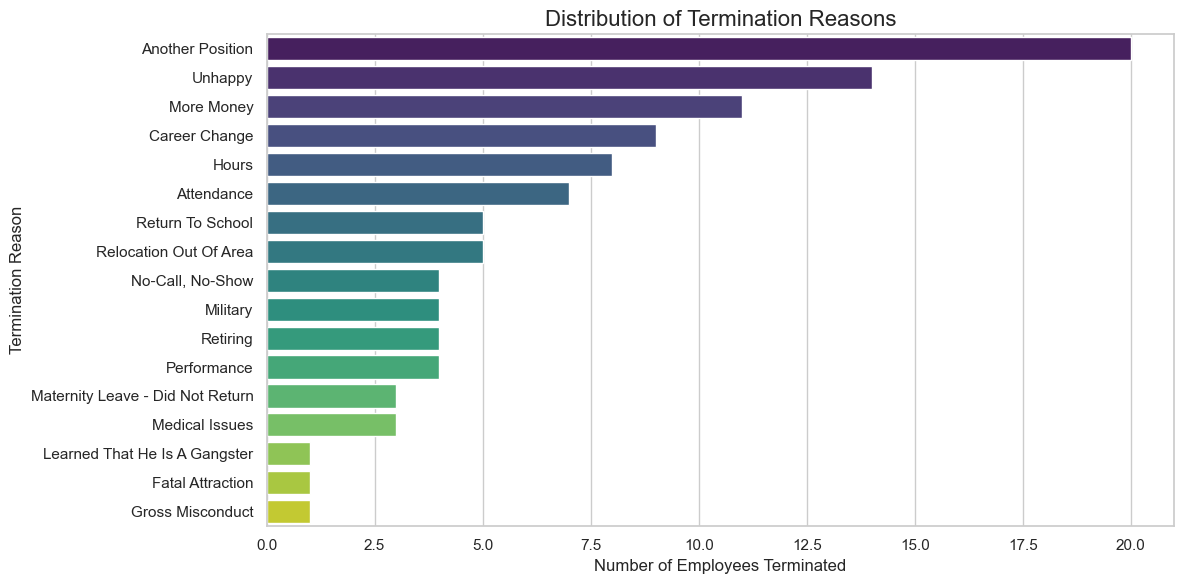

In [208]:


# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Countplot for TermReason
sns.countplot(data=df[df['Is_Terminated'] == True],
              y='TermReason',
              order=df[df['Is_Terminated'] == True]['TermReason'].value_counts().index,
              palette="viridis")

plt.title('Distribution of Termination Reasons', fontsize=16)
plt.xlabel('Number of Employees Terminated')
plt.ylabel('Termination Reason')
plt.tight_layout()
plt.show()




### Termination Reason Distribution Insights:

+ Majority of Terminations were due to position eliminations and layoffs, suggesting organizational restructuring or cost-cutting efforts.

+ A significant number of employees also left due to voluntary resignations, pointing toward possible dissatisfaction or better opportunities elsewhere.

+ Very few terminations were due to performance issues or policy violations, indicating generally stable employee conduct.

+ Natural attrition (like retirement or death) was minimal, likely reflecting a younger or mid-career workforce.

+ These trends suggest a need to:

+ Review roles frequently affected by elimination or layoffs.

+ Investigate reasons behind voluntary exits for retention improvement.

### Compare Active vs. Terminated Employees

Goal:
To compare active vs. terminated employees across key variables such as:
+ Age

+ Tenure

+ Performance Score

+ Engagement & Satisfaction

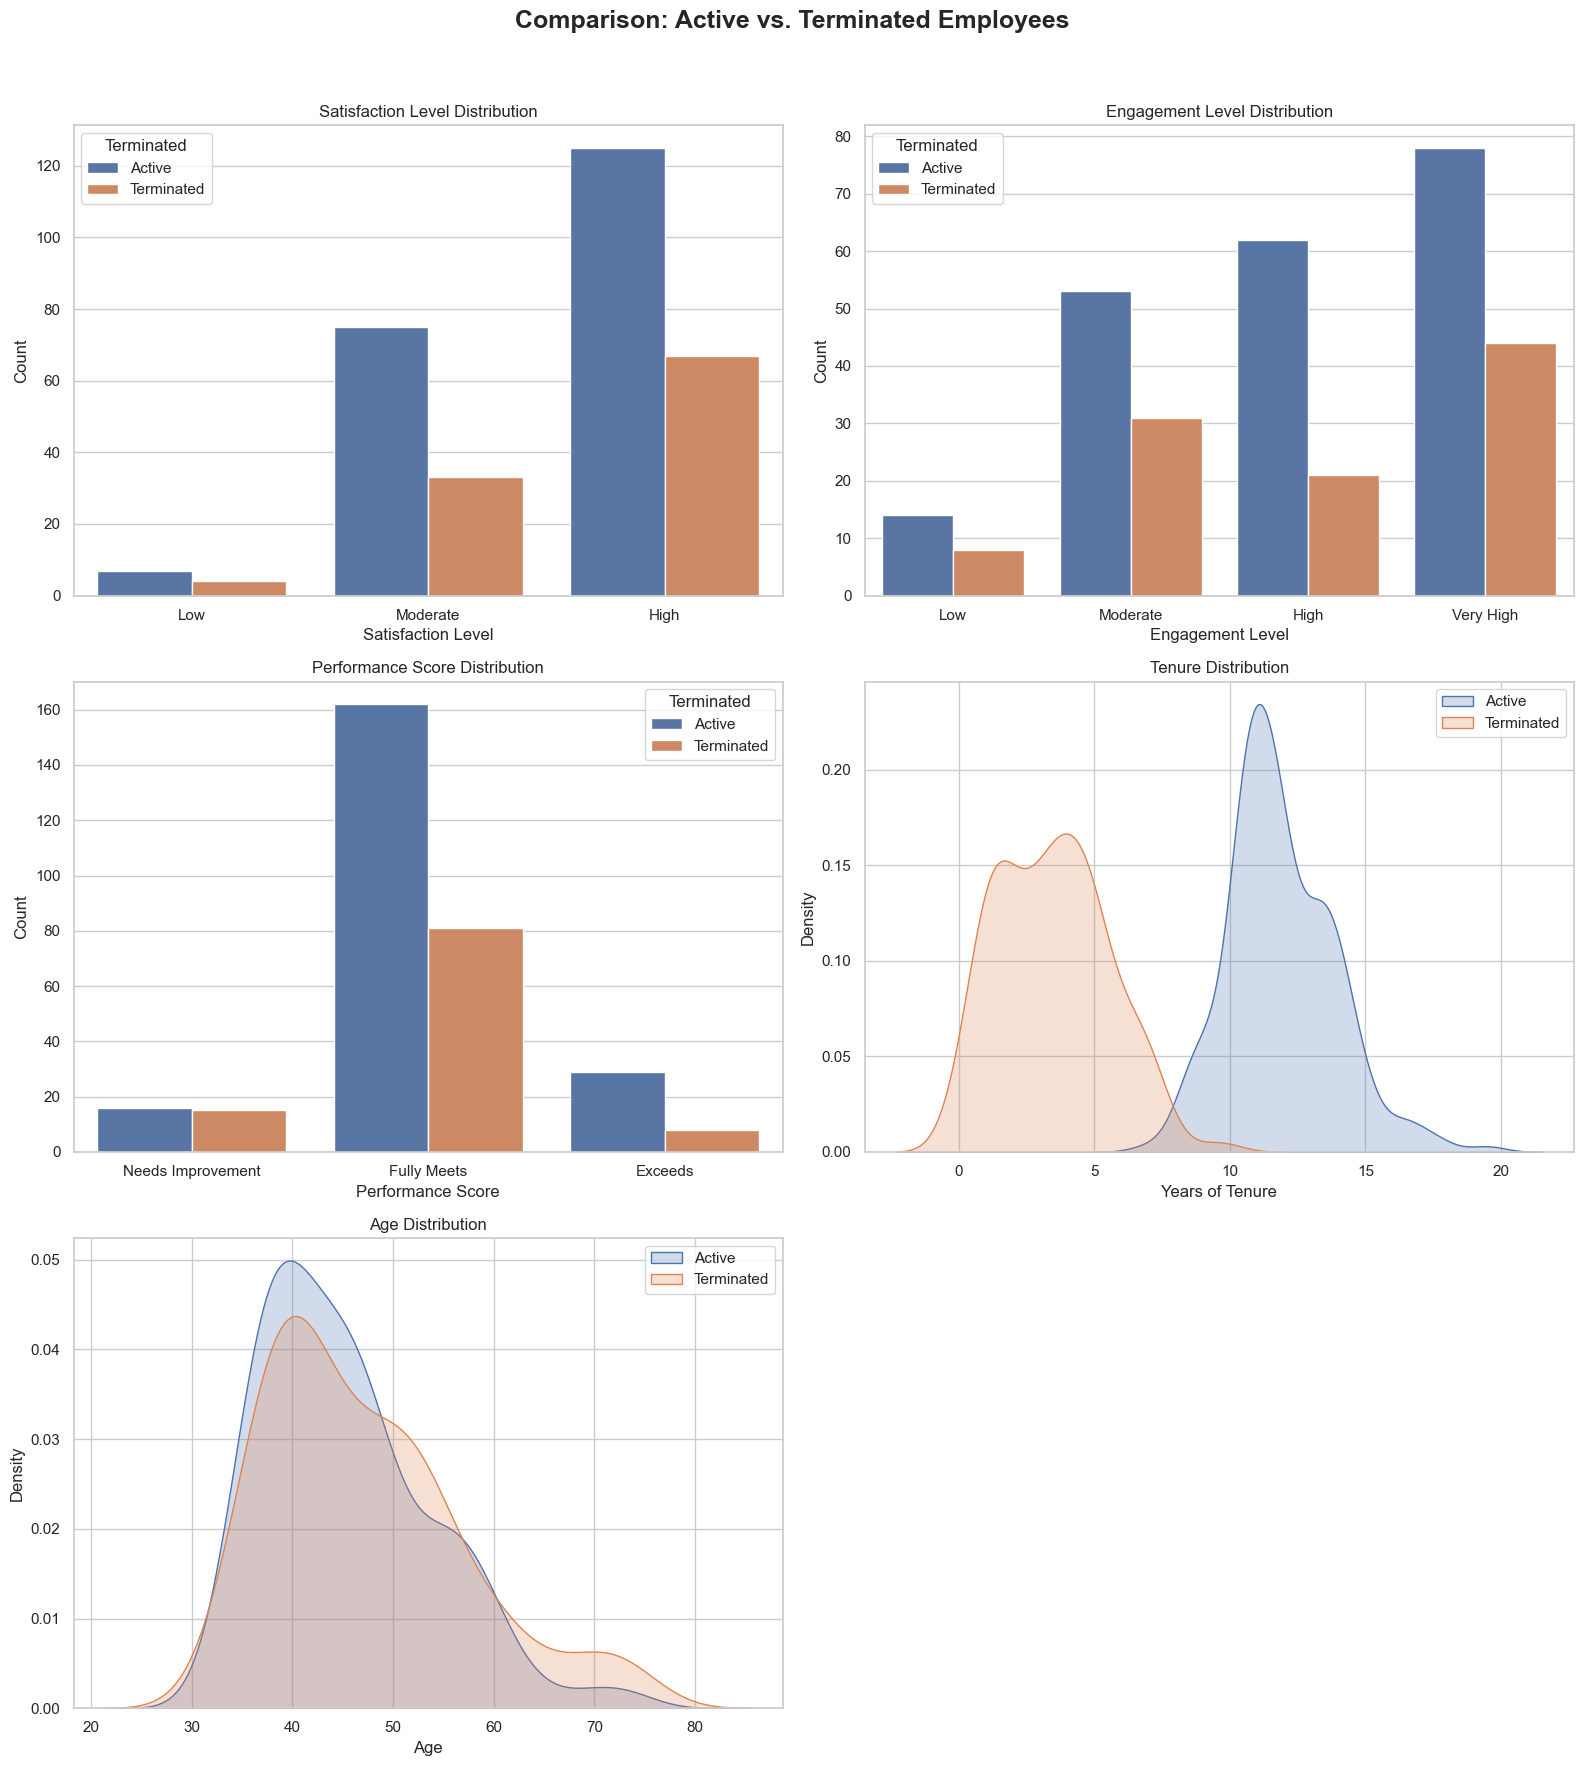

In [222]:
# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle("Comparison: Active vs. Terminated Employees", fontsize=18, fontweight='bold')

# 1. SatisfactionLevel (Count Plot)
satisfaction_order = ['Low', 'Moderate', 'High']
sns.countplot(data=df, x='SatisfactionLevel', hue='Is_Terminated', order=satisfaction_order, ax=axes[0, 0])
axes[0, 0].set_title('Satisfaction Level Distribution')
axes[0, 0].set_xlabel('Satisfaction Level')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Terminated', labels=['Active', 'Terminated'])

# 2. EngagementLevel (Count Plot)
engagement_order = ['Low', 'Moderate', 'High', 'Very High']
sns.countplot(data=df, x='EngagementLevel', hue='Is_Terminated', order=engagement_order, ax=axes[0, 1])
axes[0, 1].set_title('Engagement Level Distribution')
axes[0, 1].set_xlabel('Engagement Level')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Terminated', labels=['Active', 'Terminated'])

# 3. PerformanceScore (Count Plot)
performance_order = ['Needs Improvement', 'Fully Meets', 'Exceeds']
sns.countplot(data=df, x='PerformanceScore', hue='Is_Terminated', order=performance_order, ax=axes[1, 0])
axes[1, 0].set_title('Performance Score Distribution')
axes[1, 0].set_xlabel('Performance Score')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Terminated', labels=['Active', 'Terminated'])

# 4. TenureYears (KDE Plot)
sns.kdeplot(data=df[df['Is_Terminated'] == False], x='TenureYears', label='Active', fill=True, ax=axes[1, 1])
sns.kdeplot(data=df[df['Is_Terminated'] == True], x='TenureYears', label='Terminated', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Tenure Distribution')
axes[1, 1].set_xlabel('Years of Tenure')
axes[1, 1].legend()

# 5. Age (KDE Plot)
sns.kdeplot(data=df[df['Is_Terminated'] == False], x='Age', label='Active', fill=True, ax=axes[2, 0])
sns.kdeplot(data=df[df['Is_Terminated'] == True], x='Age', label='Terminated', fill=True, ax=axes[2, 0])
axes[2, 0].set_title('Age Distribution')
axes[2, 0].set_xlabel('Age')
axes[2, 0].legend()

# 6. Empty subplot
axes[2, 1].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Insights
**1. Satisfaction:**
 
 Terminated employees mostly have Low to Moderate satisfaction, while active employees report High satisfaction.
 
 *Higher satisfaction is linked to retention.*

**2. Engagement:**
 
 Active employees show High to Very High engagement; terminated ones lean towards Low to Moderate.
  
  *Low engagement is a risk factor for attrition.*

**3. Performance:**

 Those with "Needs Improvement" ratings are more likely to be terminated.
 
 *Performance ratings predict employee stability.*

**4. Tenure:**
 
 Terminated employees tend to have shorter tenure (< 5 years), while active ones stay longer (~10 years).
 
 *First few years are critical for retention.*

**5. Age:**
 Age distribution is mostly similar, but younger (<35) and older (>60) employees show slightly higher termination rates.

 *Career-stage-based support may be needed.*

### Termination by Department

Goal: To identify which departments experience higher employee terminations and compare them against active employee counts.

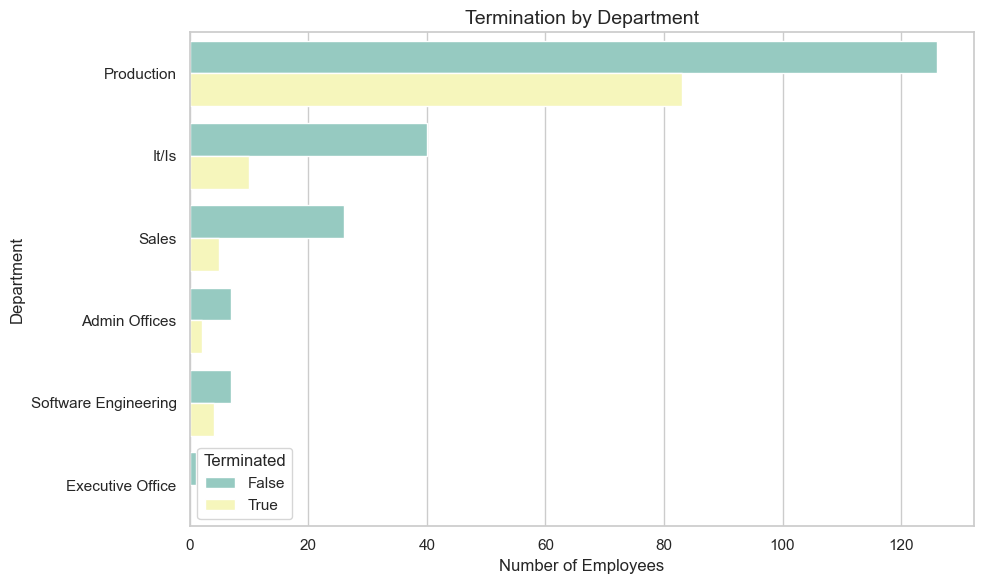

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Group and count terminations by region
termination_by_region = df.groupby(['Region', 'Is_Terminated']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=termination_by_region, x='Region', y='Count', hue='Is_Terminated', palette='Set2')

plt.title('Termination by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Number of Employees')
plt.legend(title='Terminated')
plt.tight_layout()
plt.show()


### Insights: Termination by Department
+ Production department has the highest terminations, indicating potential issues with work conditions, job nature, or employee satisfaction.

+ IT/IS shows a moderate termination rate, suggesting a fairly balanced retention.

+ Sales has a noticeable turnover, possibly due to target pressure or performance expectations.

+ Admin Offices and Software Engineering have low termination counts, showing relatively stable retention.

+ Executive Office has almost no terminations, reflecting job stability at higher leadership levels.



## 5. Diversity, Equity & Inclusion (DEI) Analysis

### Race vs. Job Level

Goal:Check whether minority groups are underrepresented in higher seniority levels and overrepresented in lower levels.

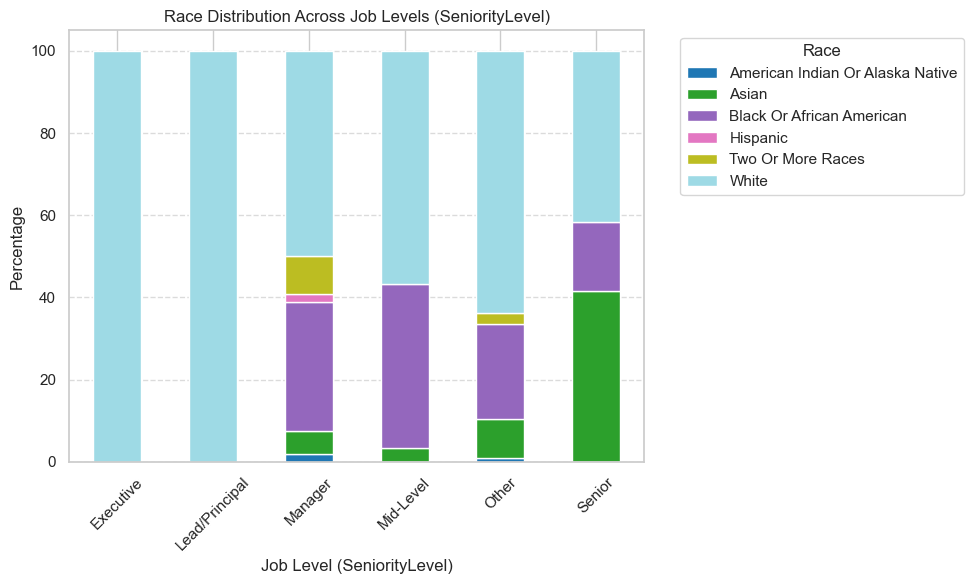

In [230]:
# Assuming df is your HR DataFrame
race_seniority = df.groupby(['SeniorityLevel', 'RaceDesc']).size().unstack(fill_value=0)

# Convert to percentages
race_seniority_percent = race_seniority.div(race_seniority.sum(axis=1), axis=0) * 100

# Plot
race_seniority_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Race Distribution Across Job Levels (SeniorityLevel)')
plt.xlabel('Job Level (SeniorityLevel)')
plt.ylabel('Percentage')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Insights:

**1. Executive and Lead/Principal Levels**
+ These levels are 100% White.

+ No racial diversity at the topmost leadership levels — a potential equity concern.

**2. Manager & Mid-Level Positions**
+ Some presence of racial minorities:

    + Black or African American employees make up a significant portion.

    + Asian and Two or More Races appear but in small proportions.

+ White employees still dominate but less than at the top levels.

+ Slight improvement in racial diversity compared to executive levels.

**3. Senior Level**
+ Noticeably more diverse:

    + Asian representation is quite high.

    + Black or African American is present but less than at mid-levels.

+ This suggests either a new wave of diverse hiring or internal progression at this level.

**4. "Other" Category**
+ Mixed race distribution — not dominated by any single group.

+ Indicates roles that may not fit traditional job level structures may be more inclusive.

### Gender vs. Manager Representation

Goal: To check if male and female employees (or other gender identities) are equitably represented in managerial roles, and to detect any gender disparity in leadership positions.

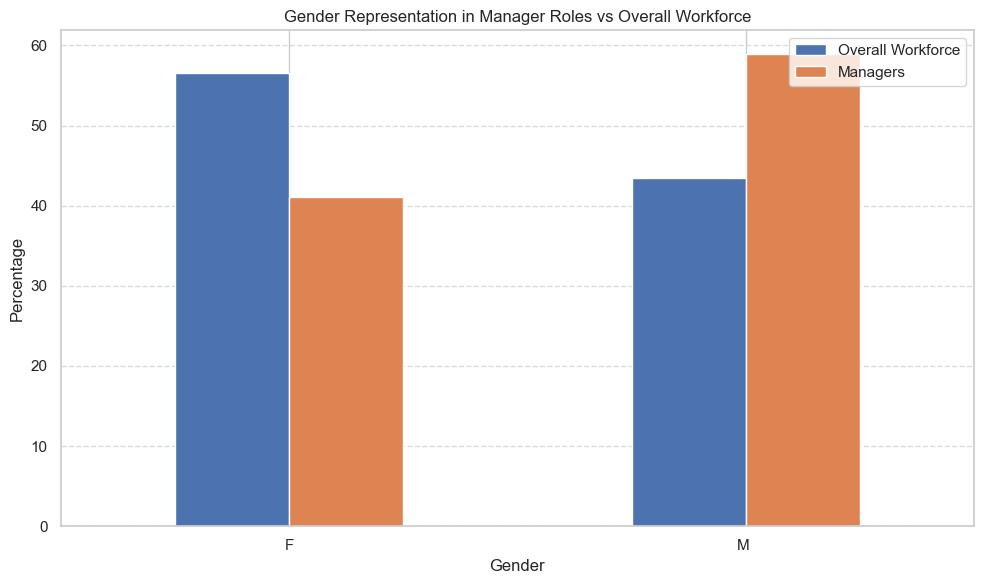

In [231]:

# Step 1: Filter only manager roles
manager_df = df[df['Is_Manager'] == True]

# Step 2: Count manager representation by gender
gender_manager_count = manager_df['Sex'].value_counts(normalize=True) * 100

# Step 3: Compare with overall gender distribution
overall_gender_dist = df['Sex'].value_counts(normalize=True) * 100

# Step 4: Combine for comparison
comparison_df = pd.DataFrame({
    'Overall Workforce': overall_gender_dist,
    'Managers': gender_manager_count
}).fillna(0)

# Step 5: Plot
comparison_df.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Gender Representation in Manager Roles vs Overall Workforce')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Insights:
**1. Underrepresentation of Females in Manager Roles:**

+ Women (F) make up approximately 57% of the total workforce.

+ But they only represent about 41% of managerial positions.

+ This indicates a gap: females are underrepresented in leadership compared to their presence in the organization.

**2. Overrepresentation of Males in Manager Roles:**

+ Men (M) comprise around 43% of the overall workforce.

+ Yet they account for approximately 59% of manager roles.

+ This suggests males are overrepresented in leadership relative to their total proportion.

**3. Equity Concern:**

+ This gap raises equity and opportunity access concerns, suggesting potential biases in promotions, development programs, or structural barriers for women reaching management roles.

### Salary by Race & Gender 

Goa:Identify whether employees across different racial and gender groups receive equitable compensation for similar roles or job levels

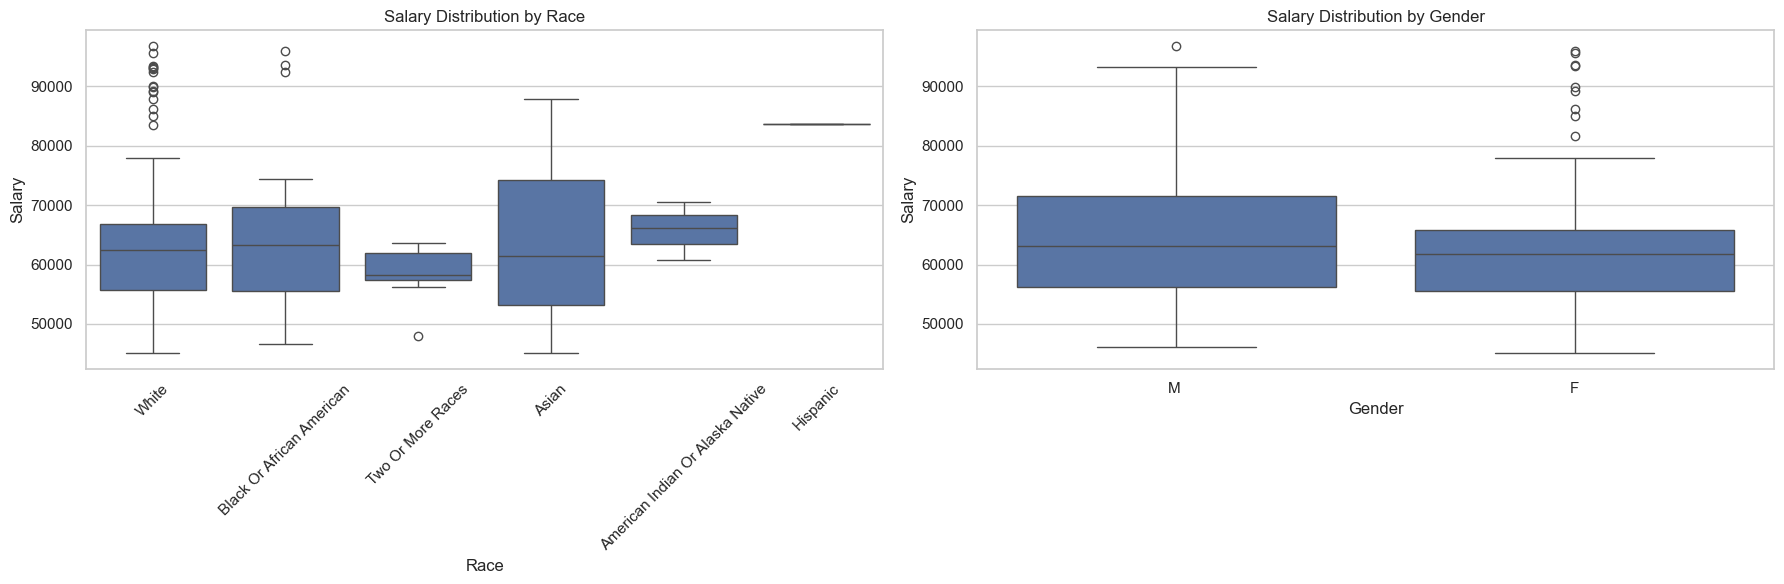

In [232]:

# Optional filtering (you can remove these lines if you want full data)
df = df[df['Is_Terminated'] == False]       # Consider only active employees
df = df[df['SalaryOutlier'] == False]       # Exclude flagged outliers

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Subplot 1: Salary vs Race ---
sns.boxplot(data=df, x='RaceDesc', y='Salary', ax=axes[0])
axes[0].set_title('Salary Distribution by Race')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Salary')
axes[0].tick_params(axis='x', rotation=45)

# --- Subplot 2: Salary vs Gender ---
sns.boxplot(data=df, x='Sex', y='Salary', ax=axes[1])
axes[1].set_title('Salary Distribution by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Salary')

plt.tight_layout()
plt.show()


### Salary by Race & Gender Insights

**1. Race-Based Salary Trends:**

+ Asians and Hispanics generally earn higher median salaries, with Asians showing a wider pay range, indicating both low and high earners.

+ Black or African American and White employees have comparable median salaries, though Whites show more high-end salary outliers.

+ Employees of Two or More Races tend to earn lower median salaries, with limited salary variation, suggesting underrepresentation in high-paying roles.

**2. Gender-Based Salary Trends:**

+ Males have a slightly higher median salary than females.

+ Males are more frequently present in higher-paying roles, as indicated by the greater number of upper outliers.

+ The overall gender pay gap appears moderate but still notable.

### Performance vs. Race Analysis

Goal: To examine whether performance ratings are equitably distributed across different racial groups, or if any racial bias or systemic disparity may exist in how performance is evaluated.

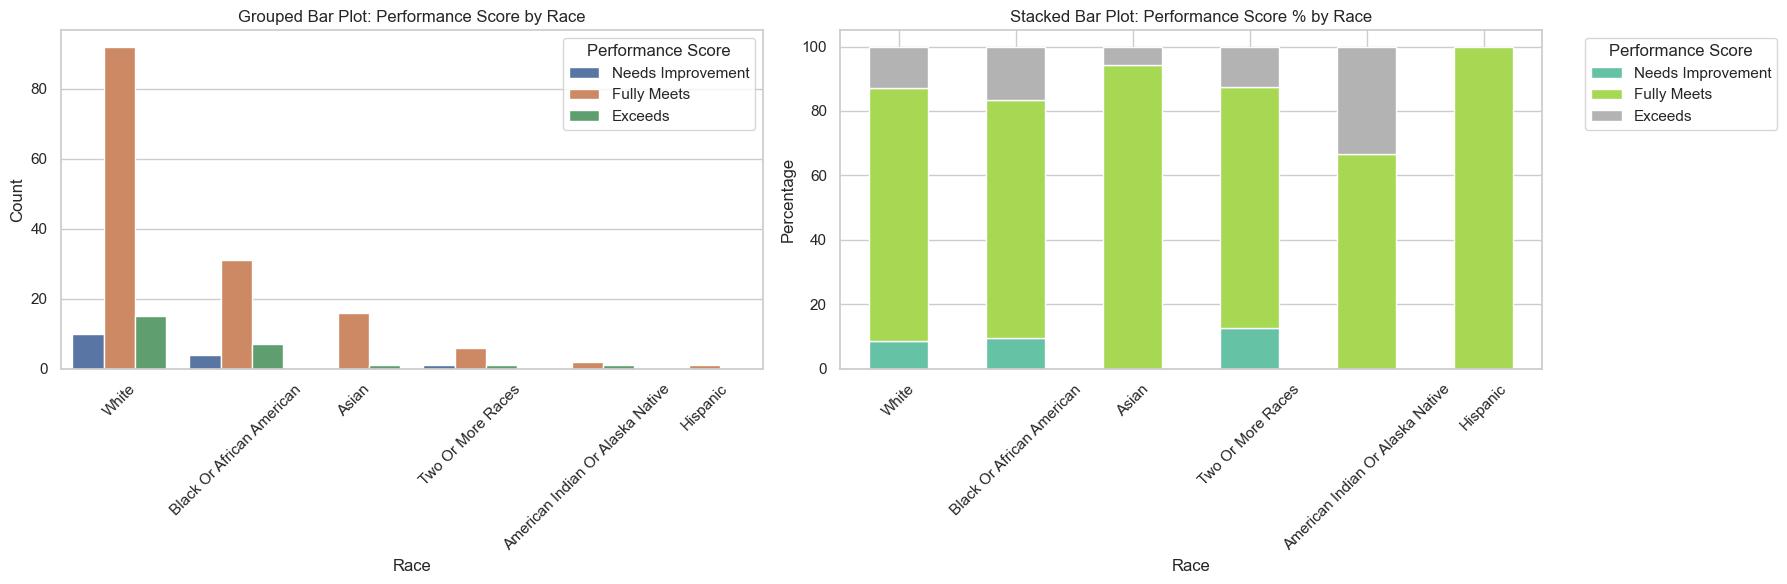

In [234]:
# Set plot style
sns.set(style="whitegrid")

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# ---- Grouped Bar Plot ----
sns.countplot(data=df, x='RaceDesc', hue='PerformanceScore',
              order=df['RaceDesc'].value_counts().index,
              ax=axes[0])
axes[0].set_title('Grouped Bar Plot: Performance Score by Race')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Performance Score')

# ---- Stacked Bar Plot ----
perf_race_ct = pd.crosstab(df['RaceDesc'], df['PerformanceScore'], normalize='index') * 100
perf_race_ct = perf_race_ct.loc[df['RaceDesc'].value_counts().index]  # Ensure same order as left plot

perf_race_ct.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set2')
axes[1].set_title('Stacked Bar Plot: Performance Score % by Race')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Percentage')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Performance Score', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()



### Insights:
+ Most employees across all races are rated as "Fully Meets" expectations, indicating consistent performance evaluation standards.

+ White employees form the majority group and show a balanced distribution, with some in both "Needs Improvement" and "Exceeds".

+ Asian employees show the highest percentage in "Fully Meets" and none in "Needs Improvement".

+ Black or African American and Two or More Races have a slightly higher proportion of "Needs Improvement" ratings.

+ Hispanic and American Indian or Alaska Native groups are very small in number, so insights from them are not statistically strong.

+ Overall, there is no major disparity in performance ratings by race, but representation gaps should be explored further.

### DEI Hiring — From Diversity Job Fair

Goal:To determine whether recruitment from diversity-focused job fairs contributes meaningfully to hiring underrepresented groups and helps build a diverse, equitable workforce.


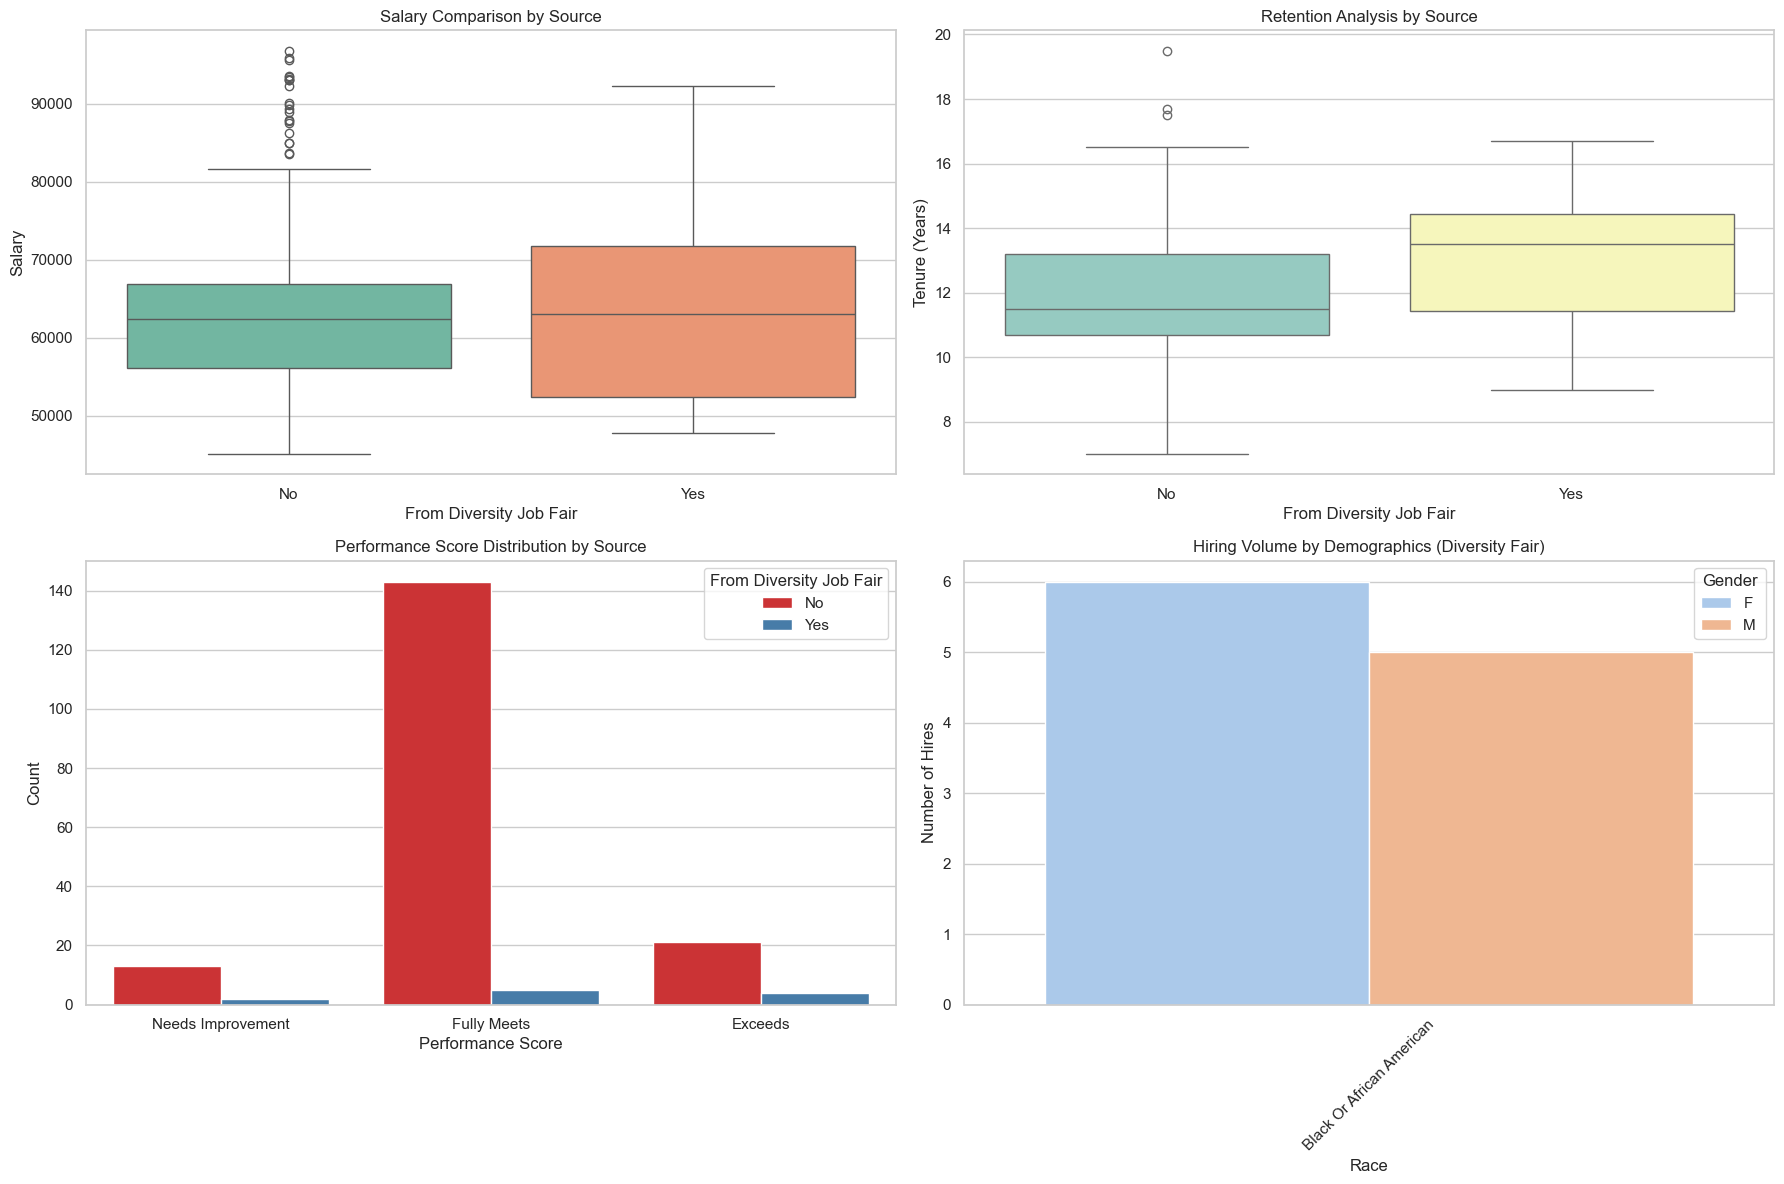

In [237]:
# Set plot style
sns.set(style="whitegrid")

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Salary Comparison by Source
sns.boxplot(
    data=df,
    x='FromDiversityJobFair',
    y='Salary',
    ax=axes[0, 0],
    palette="Set2"
)
axes[0, 0].set_title("Salary Comparison by Source")
axes[0, 0].set_xlabel("From Diversity Job Fair")
axes[0, 0].set_ylabel("Salary")

# 2. Retention Analysis
sns.boxplot(
    data=df,
    x='FromDiversityJobFair',
    y='TenureYears',
    ax=axes[0, 1],
    palette="Set3"
)
axes[0, 1].set_title("Retention Analysis by Source")
axes[0, 1].set_xlabel("From Diversity Job Fair")
axes[0, 1].set_ylabel("Tenure (Years)")

# 3. Performance & Retention Comparison (use countplot for categorical)
sns.countplot(
    data=df,
    x='PerformanceScore',
    hue='FromDiversityJobFair',
    ax=axes[1, 0],
    palette="Set1"
)
axes[1, 0].set_title("Performance Score Distribution by Source")
axes[1, 0].set_xlabel("Performance Score")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(title='From Diversity Job Fair')

# 4. Hiring Volume by Demographics
sns.countplot(
    data=df[df['FromDiversityJobFair'] == 'Yes'],
    x='RaceDesc',
    hue='Sex',
    ax=axes[1, 1],
    palette='pastel'
)
axes[1, 1].set_title("Hiring Volume by Demographics (Diversity Fair)")
axes[1, 1].set_xlabel("Race")
axes[1, 1].set_ylabel("Number of Hires")
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title="Gender")

plt.tight_layout()
plt.show()


### Insights – DEI Hiring Analysis (From Diversity Job Fair)

**1. Salary:**

+ Employees hired through Diversity Job Fairs have a slightly higher median salary and more variability in pay.

+ This may indicate hiring for a mix of junior and senior roles or stronger negotiation leverage.

**2. Retention (Tenure):**

+ Median tenure is slightly longer for diversity hires, suggesting better retention.

+ Diversity-sourced employees appear to stay as long or longer than others.

**3. Performance:**

+ Most employees from both groups fall under “Fully Meets” performance rating.

+ While the number of diversity hires is smaller, performance quality is comparable.

**4. Hiring Volume by Demographics:**

+ Diversity Job Fair hires are exclusively Black or African American.

+ Gender split shows slightly more female representation, contributing to intersectional diversity.

## Engagement, Performance & Productivity section

### PerformanceScore Distribution

 Goal:To understand the overall distribution of employee performance ratings (e.g., "Needs Improvement", "Fully Meets", "Exceeds", etc.) and whether any imbalance or bias exists.

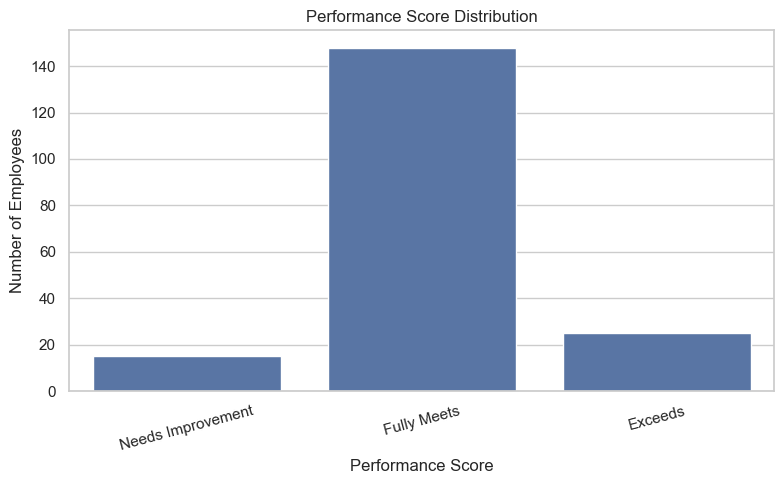

In [238]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PerformanceScore', order=['Needs Improvement', 'Fully Meets', 'Exceeds'])
plt.title('Performance Score Distribution')
plt.xlabel('Performance Score')
plt.ylabel('Number of Employees')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Performance Score Distribution Insights
+ Most employees (majority) are rated as “Fully Meets”, indicating they are performing at expected levels.

+ A small number exceed expectations, suggesting room to recognize and promote top talent.

+ Very few are underperforming, which may reflect effective hiring or evaluation practices.

+ The distribution is heavily centered, which could mean limited performance differentiation.

### EngagementSurvey vs. PerformanceScore 

how employee engagement relates to performance — a key part of understanding productivity.

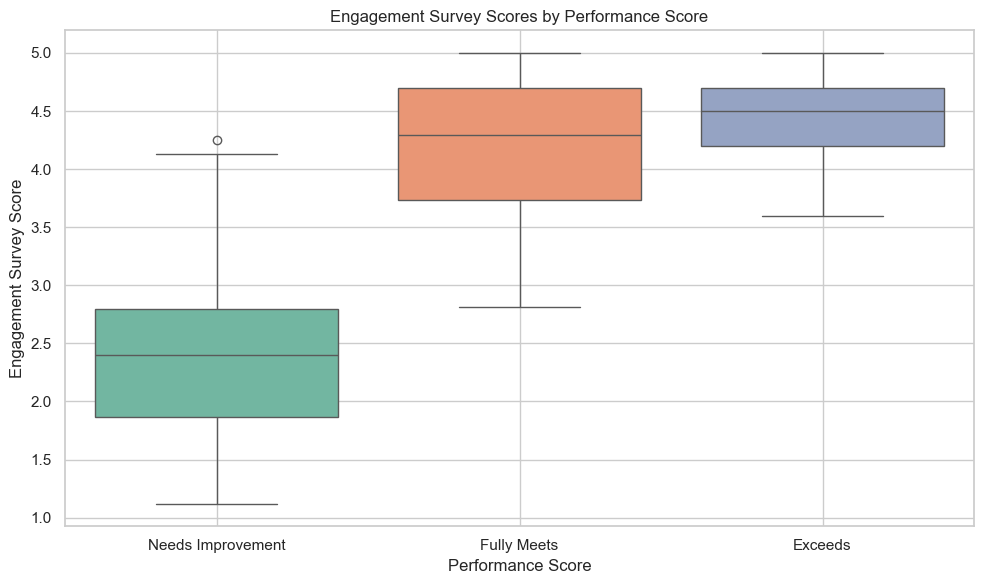

In [240]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceScore', y='EngagementSurvey', data=df, palette='Set2')
plt.title('Engagement Survey Scores by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Engagement Survey Score')
plt.grid(True)
plt.tight_layout()
plt.show()


### Insights: Engagement vs. Performance Score
+ High performers ("Exceeds") show the highest engagement levels.

+ Most employees are in the "Fully Meets" category with moderate engagement.

+ Low performers ("Needs Improvement") tend to have low and inconsistent engagement.

+ Higher engagement is associated with better performance, suggesting engagement initiatives can positively impact productivity.

### EmpSatisfaction vs. SpecialProjectsCount

Goal:To evaluate whether employees with higher satisfaction levels are involved in more special projects, which can indicate higher initiative, productivity, or trust from management.

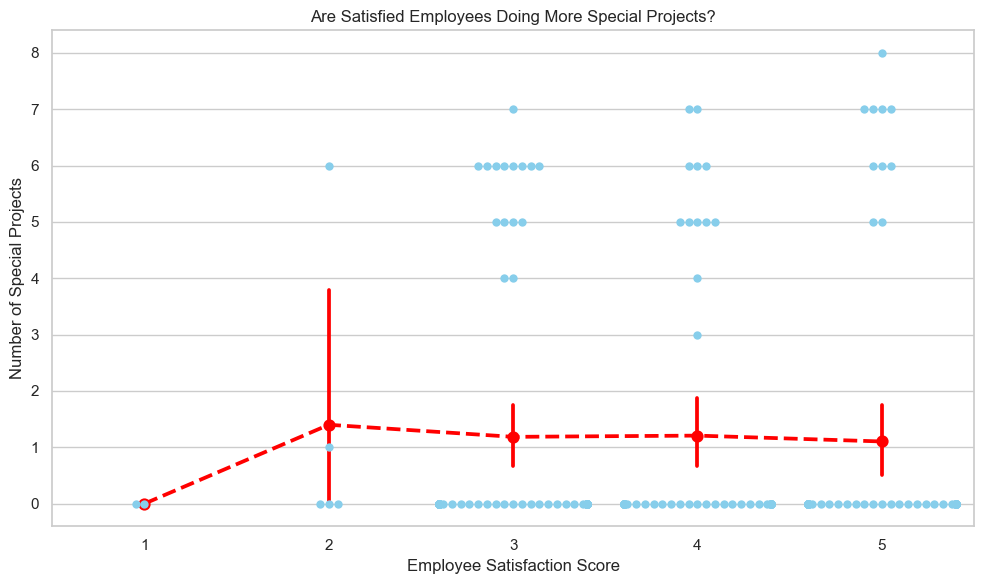

In [244]:
plt.figure(figsize=(10, 6))

# Swarm plot for actual values
sns.swarmplot(x='EmpSatisfaction', y='SpecialProjectsCount', data=df, color='skyblue', size=6)

# Mean line
sns.pointplot(x='EmpSatisfaction', y='SpecialProjectsCount', data=df, estimator=np.mean, color='red', linestyles='--')

plt.title('Are Satisfied Employees Doing More Special Projects?')
plt.xlabel('Employee Satisfaction Score')
plt.ylabel('Number of Special Projects')
plt.tight_layout()
plt.show()



### Insight:
+ Special project involvement doesn’t increase linearly with satisfaction.

+ Instead, satisfied employees are more consistently involved, but the most extreme contributors (doing 6–8 projects) also exist among less satisfied employees.

+ Could indicate:

    + Dissatisfaction due to overload (too many projects)?

    + Or passionate employees who are unsatisfied with other aspects (like compensation or leadership)?

### Absences vs. Performance Score

Goal:Explore how attendance (measured by number of absences) might impact employee performance ratings.



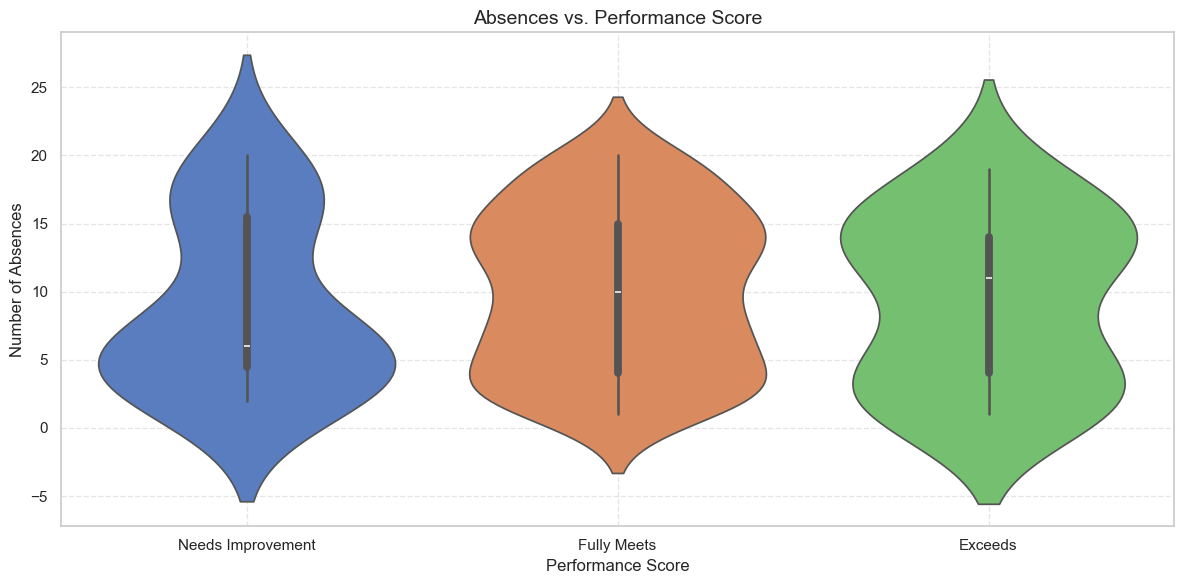

In [245]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='PerformanceScore', y='Absences', inner='box', palette='muted')

plt.title('Absences vs. Performance Score', fontsize=14)
plt.xlabel('Performance Score', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insights:
+ *Attendance does influence performance* but is not the only factor. Even employees with high absences can perform well in some cases.

+ *Poor performance is more likely to be associated* with high absences, which may warrant further investigation.

+ A *policy-level intervention* may be needed to address high absenteeism among lower performers, while understanding and supporting high performers who may have legitimate absences.

## Custom Feature Use

 


### Does Project Participation Level affect Engagement?

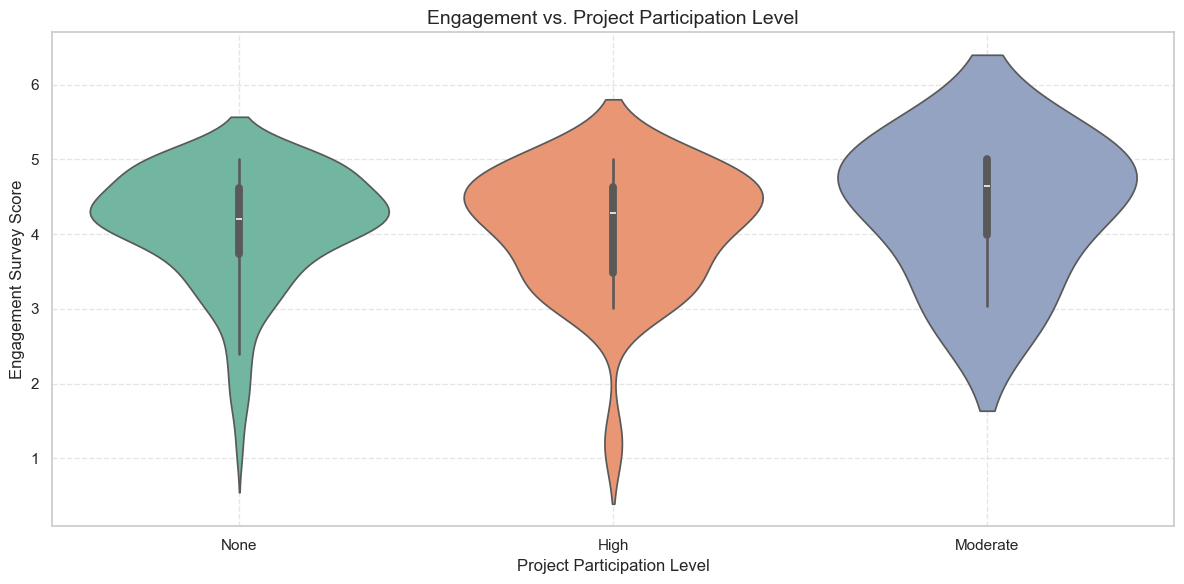

In [249]:
filtered_df = df[df['ProjectParticipationLevel'] != 'Low']

plt.figure(figsize=(12, 6))
sns.violinplot( x=filtered_df['ProjectParticipationLevel'], y=df['EngagementSurvey'], palette='Set2')

plt.title('Engagement vs. Project Participation Level', fontsize=14)
plt.xlabel('Project Participation Level')
plt.ylabel('Engagement Survey Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight: Project Participation vs. Engagement

Employees with Moderate and High project participation generally show higher and more consistent engagement levels, while those with no participation display more varied and often lower engagement. Moderate participation appears to yield the highest consistent engagement, suggesting that balanced involvement in projects positively impacts employee engagement.

### Seniority Level Analysis Overview



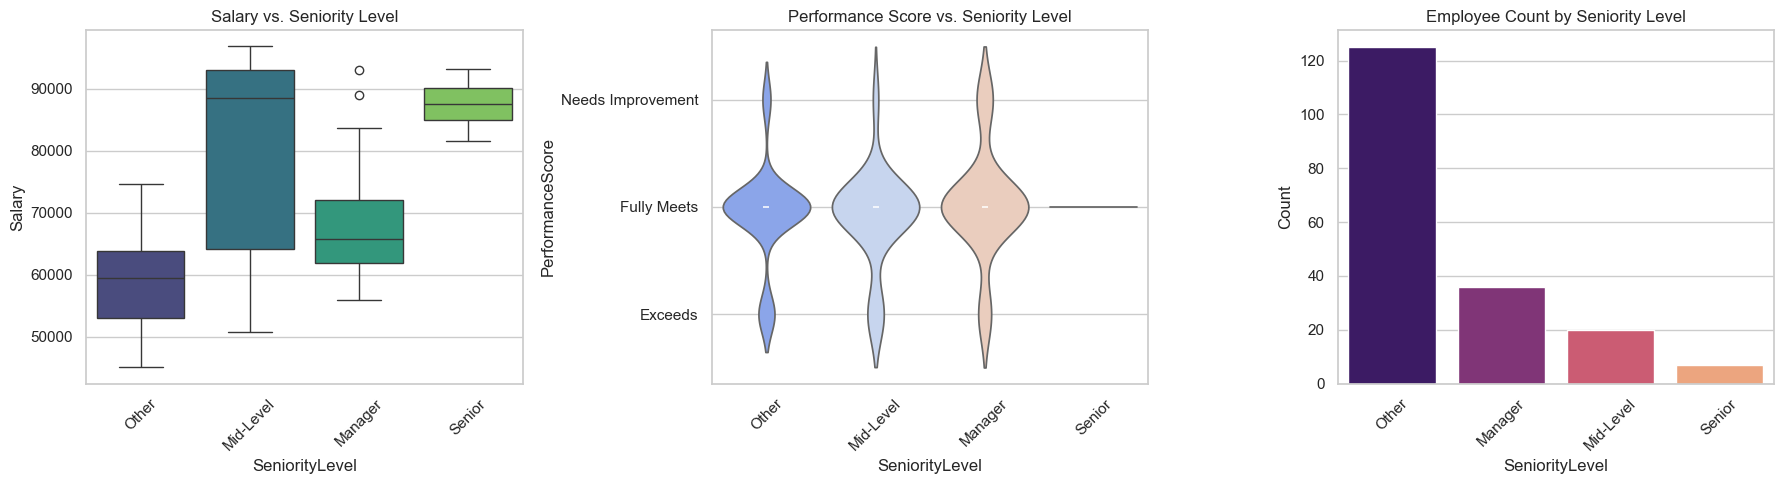

In [253]:
# Set style
sns.set(style='whitegrid')
plt.figure(figsize=(18, 5))

# --- 1. Salary vs. Seniority Level ---
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='SeniorityLevel', y='Salary', palette='viridis')
plt.title('Salary vs. Seniority Level')
plt.xticks(rotation=45)

# --- 2. Performance Score vs. Seniority Level ---
plt.subplot(1, 3, 2)
sns.violinplot(data=df, x='SeniorityLevel', y='PerformanceScore', palette='coolwarm')
plt.title('Performance Score vs. Seniority Level')
plt.xticks(rotation=45)

# 3. Count of Employees by Seniority Level
plt.subplot(1, 3, 3)
seniority_counts = df['SeniorityLevel'].value_counts().reset_index()
seniority_counts.columns = ['SeniorityLevel', 'Count']
sns.barplot(data=seniority_counts, x='SeniorityLevel', y='Count', palette='magma')
plt.title('Employee Count by Seniority Level')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Insights on Seniority Level Analysis

**1. Salary Distribution:**

+ Senior employees have the highest and most consistent salaries.

+ Mid-Level and Managers show wide salary variation, indicating diverse compensation structures.

+ 'Other' roles earn the lowest median salary, likely entry-level or support positions.

**2. Performance Trends:**

+ Majority across all levels "Fully Meet" expectations.

+ “Exceeds” ratings are mostly seen in Mid-Level and Manager roles.

+ Senior roles are highly consistent, showing stable performance.

**3. Workforce Composition:**

+ Most employees fall under the "Other" category.

+ Senior roles are very limited in number, as expected in hierarchical setups.

### RecruitmentChannel vs Is_Referred vs PerformanceScore

Goal: Identify which recruitment channels and referral status are most effective at bringing in top-performing employees.

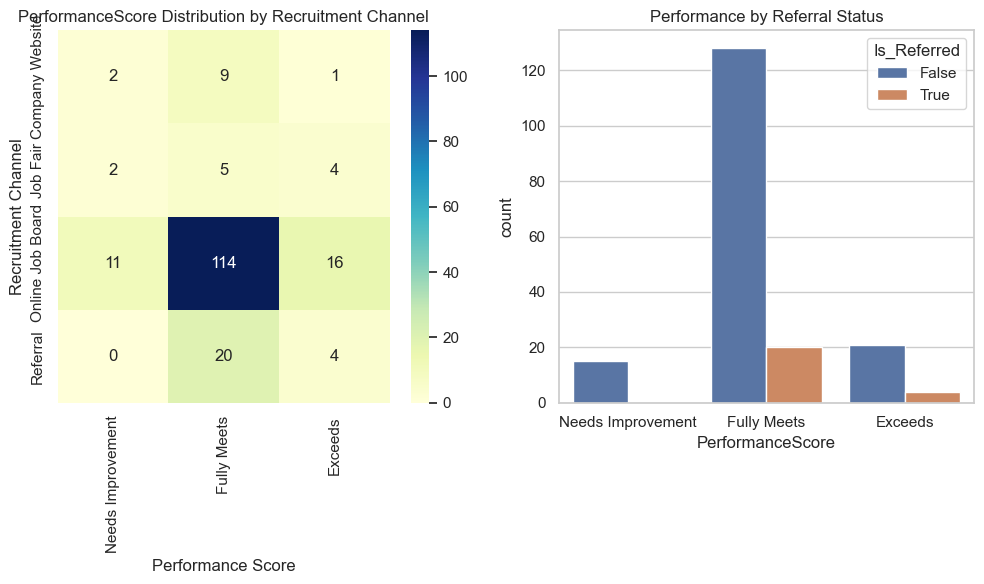

In [257]:
# Group and count
grouped = df.groupby(['RecruitmentChannel', 'Is_Referred', 'PerformanceScore']).size().reset_index(name='Count')

# Pivot for heatmap
pivot = grouped.pivot_table(index='RecruitmentChannel', columns='PerformanceScore', values='Count', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 6))

# Plot heatmap

plt.subplot(1, 2, 1)
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("PerformanceScore Distribution by Recruitment Channel")
plt.ylabel("Recruitment Channel")
plt.xlabel("Performance Score")


# Optional: Referral impact
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='PerformanceScore', hue='Is_Referred')
plt.title("Performance by Referral Status")

plt.tight_layout()
plt.show()


### Insight

**1. Recruitment Channel Insights:**

+ Most hires from all channels fall under "Fully Meets" performance.

+ Very few employees are rated "Exceeds Expectations", regardless of the channel.

+ No single channel significantly outperforms others in bringing top talent.

**2. Referral vs. Non-Referral Insights:**

+ Referred employees show a higher share of top performance ratings.

+ While fewer in number, they are more likely to be rated "Exceeds" or "Fully Meets".

+ Non-referred employees dominate in count but also include more "Needs Improvement" ratings.

### How AbsenceLevel and LatenessSeverity Effect  Performance

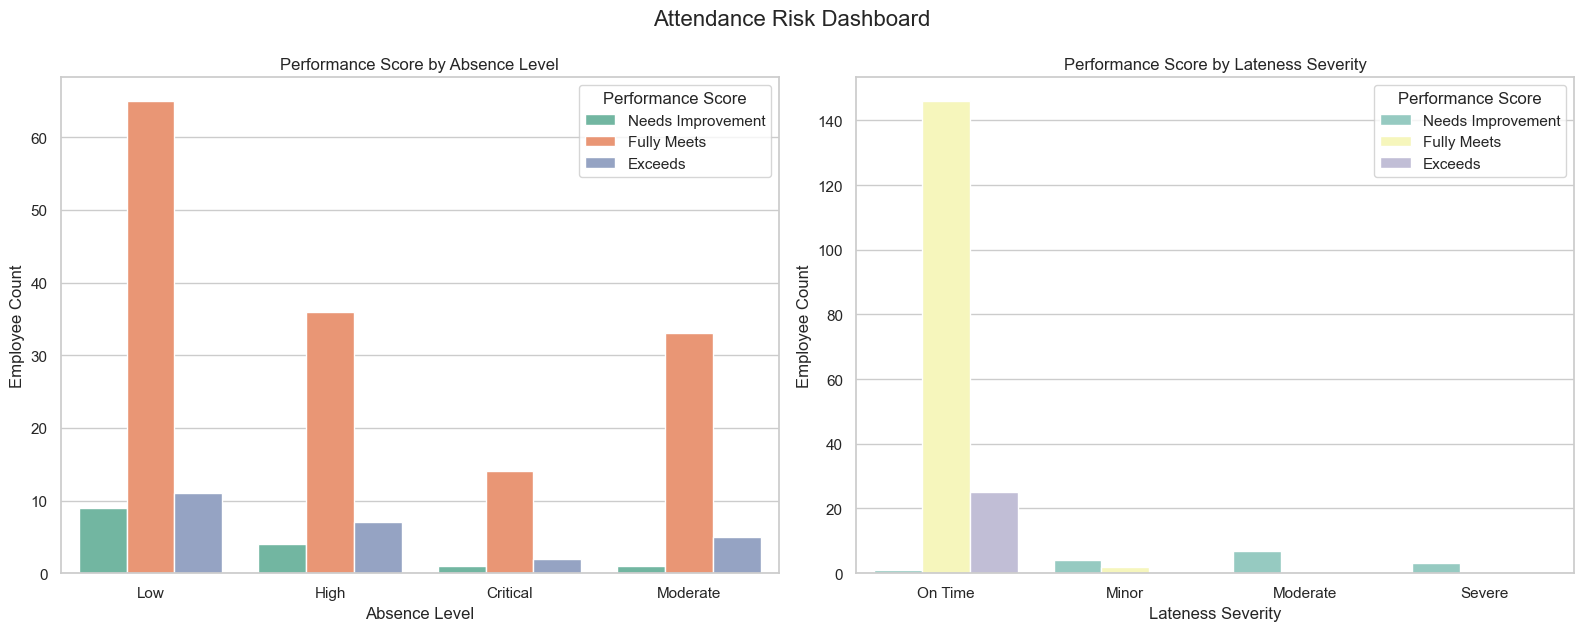

In [263]:
# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: AbsenceLevel vs PerformanceScore
sns.countplot(data=df, x='AbsenceLevel', hue='PerformanceScore', ax=axes[0], palette='Set2')
axes[0].set_title('Performance Score by Absence Level')
axes[0].set_xlabel('Absence Level')
axes[0].set_ylabel('Employee Count')
axes[0].legend(title='Performance Score', loc='upper right')

# Plot 2: LatenessSeverity vs PerformanceScore
sns.countplot(data=df, x='LatenessSeverity', hue='PerformanceScore', ax=axes[1], palette='Set3')
axes[1].set_title('Performance Score by Lateness Severity')
axes[1].set_xlabel('Lateness Severity')
axes[1].set_ylabel('Employee Count')
axes[1].legend(title='Performance Score', loc='upper right')

# Final touches
plt.tight_layout()
plt.suptitle('Attendance Risk Dashboard', fontsize=16, y=1.05)
plt.show()


### Insight

**1. Absence Level Insight:**

+ Employees with low absence levels are more likely to fully meet or exceed performance expectations.

+ Those with critical or high absences rarely exceed expectations and show signs of declining performance.

**2. Lateness Severity Insight:**

+ Employees who are consistently on time tend to perform better, with most fully meeting or exceeding expectations.

+ Increasing lateness severity correlates with a drop in performance, especially for those with moderate or severe lateness.